# Simulation for PSM and PSM-DBSCAN

In [1]:
from PSM import psm
import utils 
import numpy as np
import math
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import DBSCAN

DEG = math.degrees(1)  # Conversion factor: one radian in degrees (unused in this snippet)
PI = np.pi           # Define PI for later use
colors = plt.cm.Set3.colors + plt.cm.Set2.colors  # Use Set3 and Set2 colormap for cluster colors 

## Simulation for dimensionality reduction

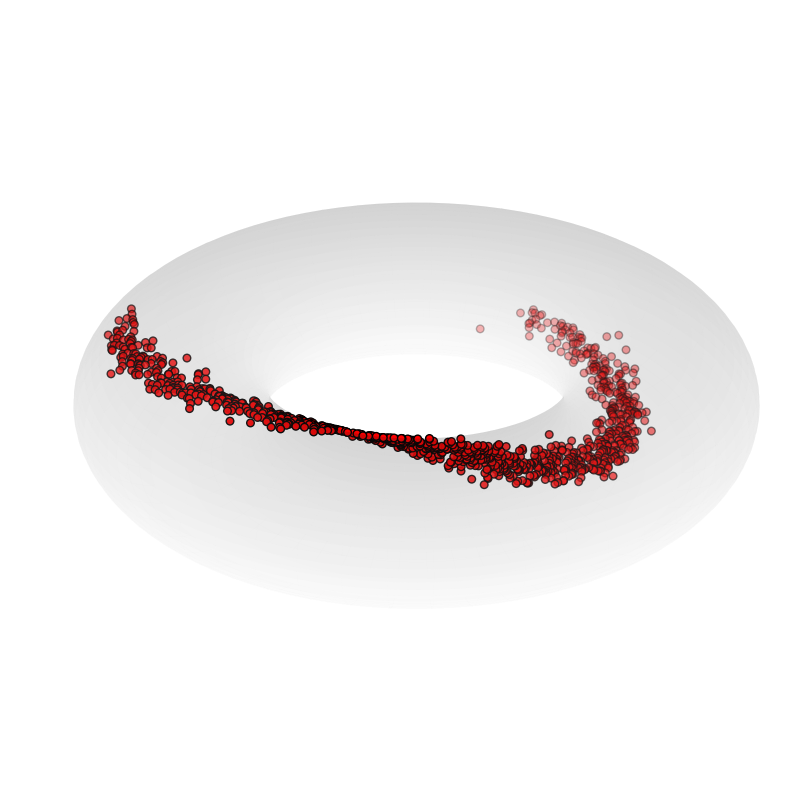

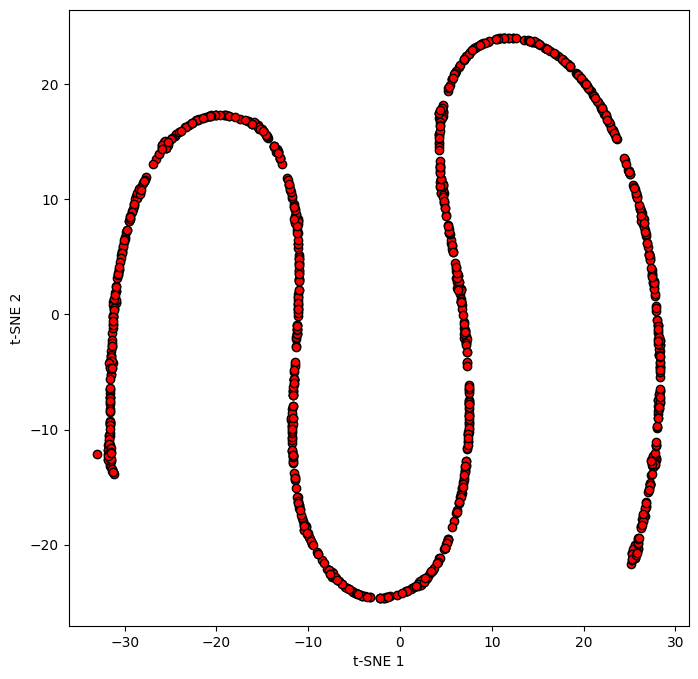

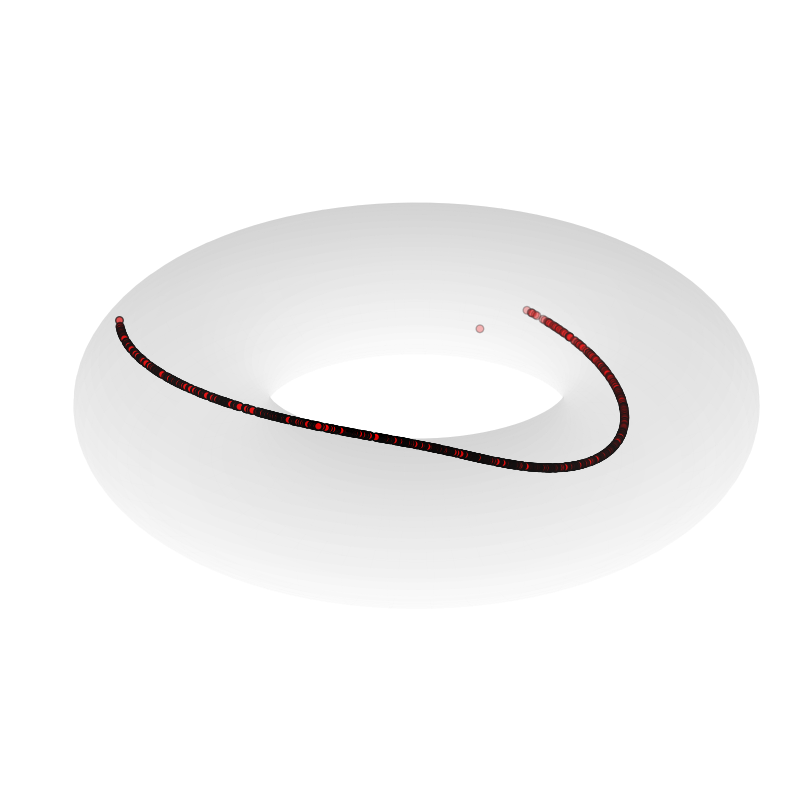

In [2]:
# PSM for dimensionality reduction demonstration

n_features = 2       # Set number of features/dimensions
case = 1             # Choose the case for data generation (case 1 in this example)
n_samples = 1000     # Number of samples to generate
noise_level = 0.1    # Noise level for the generated data

# Generate data samples for dimensionality reduction using the data_generator_dr function
samples, samples_without_noise = utils.data_generator_dr(n_features=n_features, case=case, n_samples=n_samples, noise_level=noise_level)
if n_features == 2:
    utils.plot_torus_samples(samples)

subm_list = []                   # List to store fitted submanifolds at different dimensions
approximation_error_list = []    # List to store approximation errors for each fitted submanifold
information_contained_psm_list = []  # List to store the information contained in each submanifold (not used directly here)

# Iterate through each feature dimension to perform PSM
for d in range(n_features):
    # Convert angle values to cosine-sine pairs
    samples_m = utils.angle_to_cos_sin(samples)
    
    # Apply the PSM algorithm:
    #   - sigma: neighborhood radius for finding neighbors
    #   - 5: maximum number of iterations for each point (outer loop)
    #   - rho=0.001: convergence threshold for inner loop
    #   - e_n: parameter controlling dimension reduction, here decreasing with d
    
    sigma = 0.3          # Neighborhood radius parameter for PSM algorithm
    subm = psm(samples_m, sigma, 5, rho=0.001, e_n=2*n_features-d-1)
    
    # Convert the cosine-sine representation back to angle values
    subm = utils.cos_sin_to_angle(subm)
    # Adjust the angles to be within the range [0, 2π]
    subm = (subm + 2*PI) % (2*PI)
    
    # Compute the approximation error by comparing with the noise-free samples
    approximation_error = utils.compute_approximation_error(subm, samples_without_noise)
    approximation_error_list.append(approximation_error)
    subm_list.append(subm)

# Compute the proportion of information retained for each feature in the fitted submanifolds
proportion_of_information_retained_psm = utils.compute_information_retention(n_features=n_features, samples=samples, samples_fitted=subm_list)

# Apply t-SNE for visualization on the fitted submanifold for the first dimension
tsne = TSNE(n_components=2, perplexity=30, n_iter=500, init='pca', random_state=42)
X_tsne = tsne.fit_transform(subm_list[0])

# Plot the t-SNE results for visualization
plt.figure(figsize=(8, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c='red', edgecolor='k')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()

if n_features == 2:
    utils.plot_torus_samples(subm_list[0])


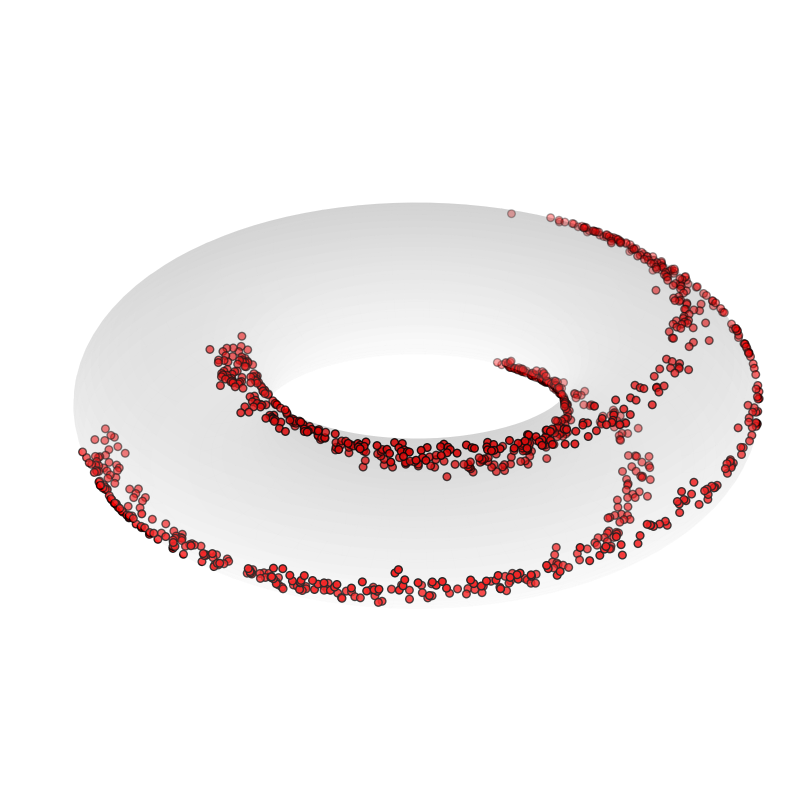

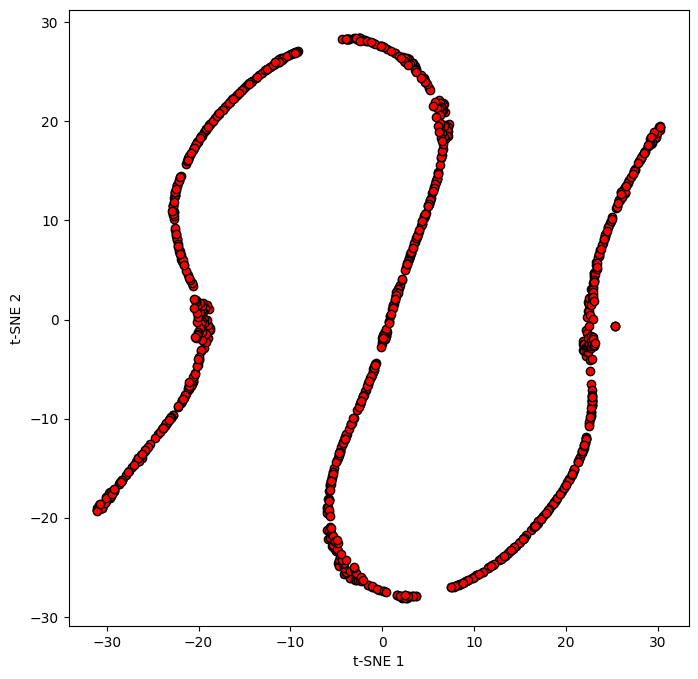

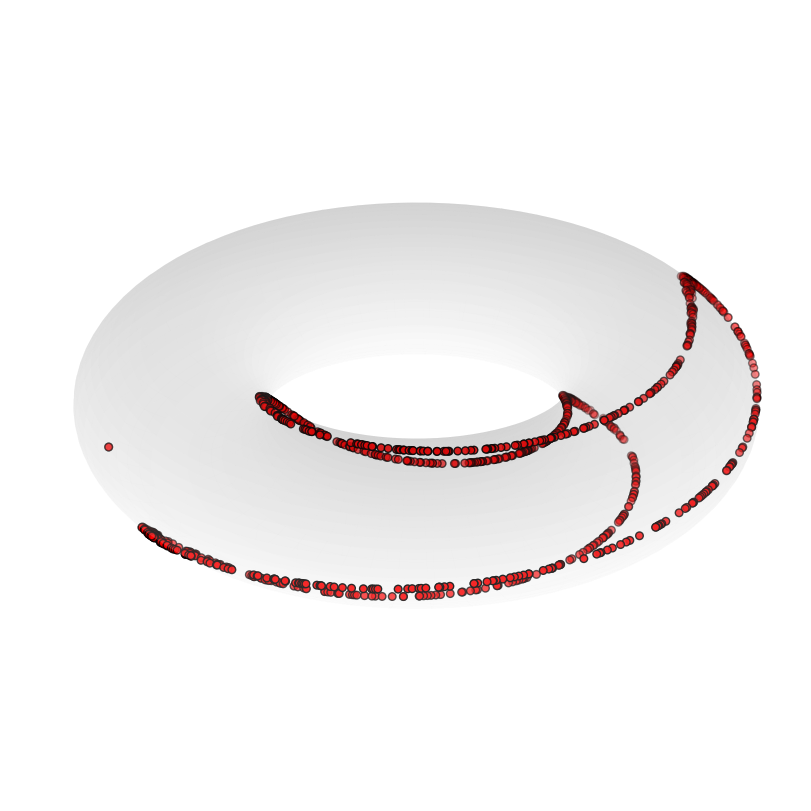

In [3]:
# PSM for dimensionality reduction demonstration

n_features = 2       # Set number of features/dimensions
case = 2             # Choose the case for data generation (case 1 in this example)
n_samples = 1000     # Number of samples to generate
noise_level = 0.1    # Noise level for the generated data

# Generate data samples for dimensionality reduction using the data_generator_dr function
samples, samples_without_noise = utils.data_generator_dr(n_features=n_features, case=case, n_samples=n_samples, noise_level=noise_level)
if n_features == 2:
    utils.plot_torus_samples(samples)

subm_list = []                   # List to store fitted submanifolds at different dimensions
approximation_error_list = []    # List to store approximation errors for each fitted submanifold
information_contained_psm_list = []  # List to store the information contained in each submanifold (not used directly here)

# Iterate through each feature dimension to perform PSM
for d in range(n_features):
    # Convert angle values to cosine-sine pairs
    samples_m = utils.angle_to_cos_sin(samples)
    
    # Apply the PSM algorithm:
    #   - sigma: neighborhood radius for finding neighbors
    #   - 5: maximum number of iterations for each point (outer loop)
    #   - rho=0.001: convergence threshold for inner loop
    #   - e_n: parameter controlling dimension reduction, here decreasing with d
    sigma = 0.3          # Neighborhood radius parameter for PSM algorithm
    subm = psm(samples_m, sigma, 5, rho=0.001, e_n=2*n_features-d-1)
    
    # Convert the cosine-sine representation back to angle values
    subm = utils.cos_sin_to_angle(subm)
    # Adjust the angles to be within the range [0, 2π]
    subm = (subm + 2*PI) % (2*PI)
    
    # Compute the approximation error by comparing with the noise-free samples
    approximation_error = utils.compute_approximation_error(subm, samples_without_noise)
    approximation_error_list.append(approximation_error)
    subm_list.append(subm)

# Compute the proportion of information retained for each feature in the fitted submanifolds
proportion_of_information_retained_psm = utils.compute_information_retention(n_features=n_features, samples=samples, samples_fitted=subm_list)

# Apply t-SNE for visualization on the fitted submanifold for the first dimension
tsne = TSNE(n_components=2, perplexity=30, n_iter=500, init='pca', random_state=42)
X_tsne = tsne.fit_transform(subm_list[0])

# Plot the t-SNE results for visualization
plt.figure(figsize=(8, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c='red', edgecolor='k')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()

if n_features == 2:
    utils.plot_torus_samples(subm_list[0])

## Simulation for clustering

### PSM-DBSCAN

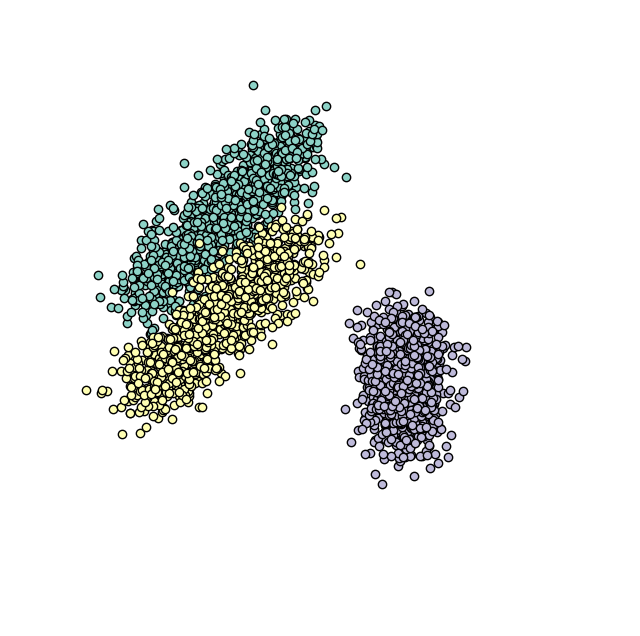

In [4]:
n_features = 2               # Set number of features/dimensions
case = 1                     # Select case 2 for data generation
n_samples = 1000             # Number of samples per cluster
noise_level = 0.2            # Noise level for the data

# Generate clustering data with n_features dimensions
X, true_labels = utils.data_generator_cl(n_features, case, n_samples, noise_level=noise_level)

unique_true_labels = np.unique(true_labels)
if X.shape[1] > 2:
    # If the data has more than 2 dimensions, use t-SNE to reduce to 2D for visualization
    tsne = TSNE(n_components=2, perplexity=30, n_iter=500, init='pca', random_state=42)
    X_tsne = tsne.fit_transform(X)
    
    # Plot t-SNE visualization
    plt.figure(figsize=(8, 8))
    # Plot each cluster manually and add legend
    for i, true_label in zip(range(0, 5 * n_samples, n_samples), unique_true_labels):
        plt.scatter(X_tsne[true_labels == true_label, 0], 
                    X_tsne[true_labels == true_label, 1], 
                    color=colors[true_label], 
                    edgecolors="black")   

    plt.xlabel('t-SNE 1')
    plt.ylabel('t-SNE 2')
    plt.axis('off')
    plt.show()
else:
    # If data is 2D, plot directly without t-SNE
    plt.figure(figsize=(8, 8))
    for i, true_label in zip(range(0, 5 * n_samples, n_samples), unique_true_labels):
        plt.scatter(X[true_labels == true_label, 0], 
                    X[true_labels == true_label, 1], 
                    color=colors[true_label], 
                    edgecolors="black")    
    plt.xlim(0, 2 * np.pi)
    plt.ylim(0, 2 * np.pi)
    plt.axis('off')
    plt.show()

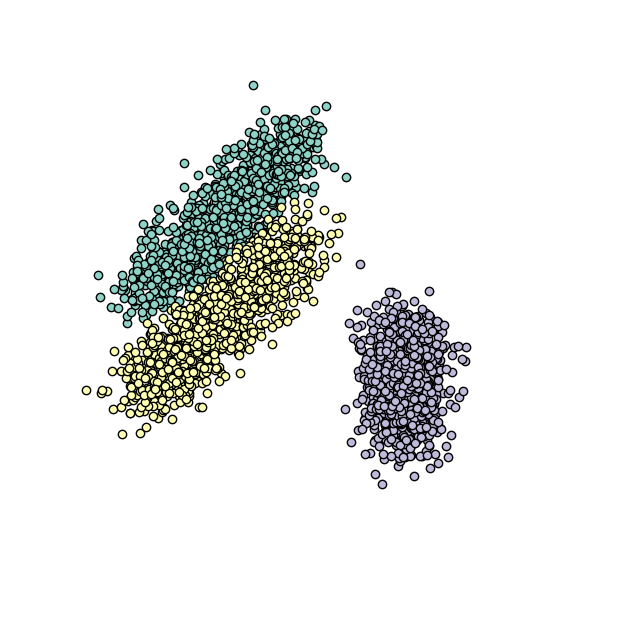

Adjusted Rand Index (ARI): 0.9436
Normalized Mutual Information (NMI): 0.9198


In [5]:
# PSM step
sigma = 0.25  # Set neighborhood radius for PSM
R = utils.angle_to_cos_sin(X)  # Convert angle values to cosine-sine pairs
subm = psm(R, sigma, 5, rho=0.001, e_n=2 * n_features - 1)  # Apply PSM algorithm
c = utils.cos_sin_to_angle(subm)  # Convert back to angle representation
c_1 = (c + 2 * PI) % (2 * PI)    # Adjust angles to be in the range [0, 2π]

# DBSCAN clustering on the PSM processed data
min_samples = 50  # Minimum samples required for DBSCAN neighborhood
# utils.plot_k_distance(c_1, min_samples)  # Plot k-distance graph to help select eps
eps = 0.1  # Set epsilon neighborhood parameter for DBSCAN

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
clusters = dbscan.fit_predict(c_1)

# Identify noise points (label -1) and inliers (normal clusters)
mask_inliers = clusters != -1
mask_outliers = clusters == -1

X_inliers = c_1[mask_inliers]
clusters_inliers = clusters[mask_inliers]
X_outliers = c_1[mask_outliers]

# Use k-Nearest Neighbors to reclassify the outliers using inliers as training data
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_inliers, clusters_inliers)
predicted_clusters_outliers = knn.predict(X_outliers)

# Update the original cluster labels with the predicted labels for outliers
final_clusters = clusters.copy()
final_clusters[mask_outliers] = predicted_clusters_outliers

# Visualization of the final clustering results
if X.shape[1] > 2:
    plt.figure(figsize=(8, 8))
    unique_clusters = np.unique(final_clusters)
    # Plot each cluster in the t-SNE reduced space
    for cluster in unique_clusters:
        plt.scatter(
            X_tsne[final_clusters == cluster, 0],
            X_tsne[final_clusters == cluster, 1],
            color=colors[cluster],
            label=f"Cluster {cluster}",            
            edgecolors="black"
        )
    plt.xlabel('t-SNE 1')
    plt.ylabel('t-SNE 2')
    plt.axis('off')
    plt.show()
else:
    # If data is 2D, visualize directly
    plt.figure(figsize=(8, 8))
    unique_clusters = np.unique(final_clusters)   
    for cluster in unique_clusters:
        plt.scatter(
            X[final_clusters == cluster, 0],
            X[final_clusters == cluster, 1],
            color=colors[cluster],
            label=f"Cluster {cluster}",
            edgecolors="black"
        )
    plt.xlim(0, 2 * np.pi)
    plt.ylim(0, 2 * np.pi)
    plt.axis('off')
    plt.show()

# Compute evaluation metrics: Adjusted Rand Index (ARI) and Normalized Mutual Information (NMI)
ari = metrics.adjusted_rand_score(true_labels, final_clusters)
print(f"Adjusted Rand Index (ARI): {ari:.4f}")

nmi = metrics.normalized_mutual_info_score(true_labels, final_clusters)
print(f"Normalized Mutual Information (NMI): {nmi:.4f}")


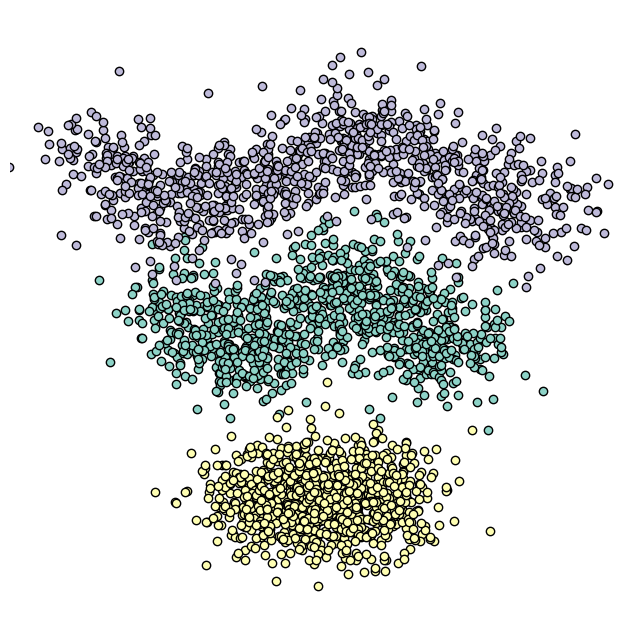

In [6]:
n_features = 2               # Set number of features/dimensions
case = 2                     # Select case 2 for data generation
n_samples = 1000             # Number of samples per cluster
noise_level = 0.3            # Noise level for the data

# Generate clustering data with n_features dimensions
X, true_labels = utils.data_generator_cl(n_features, case, n_samples, noise_level=noise_level)

unique_true_labels = np.unique(true_labels)
if X.shape[1] > 2:
    # If the data has more than 2 dimensions, use t-SNE to reduce to 2D for visualization
    tsne = TSNE(n_components=2, perplexity=30, n_iter=500, init='pca', random_state=42)
    X_tsne = tsne.fit_transform(X)
    
    # Plot t-SNE visualization
    plt.figure(figsize=(8, 8))
    # Plot each cluster manually and add legend
    for i, true_label in zip(range(0, 5 * n_samples, n_samples), unique_true_labels):
        plt.scatter(X_tsne[true_labels == true_label, 0], 
                    X_tsne[true_labels == true_label, 1], 
                    color=colors[true_label], 
                    edgecolors="black")   

    plt.xlabel('t-SNE 1')
    plt.ylabel('t-SNE 2')
    plt.axis('off')
    plt.show()
else:
    # If data is 2D, plot directly without t-SNE
    plt.figure(figsize=(8, 8))
    for i, true_label in zip(range(0, 5 * n_samples, n_samples), unique_true_labels):
        plt.scatter(X[true_labels == true_label, 0], 
                    X[true_labels == true_label, 1], 
                    color=colors[true_label], 
                    edgecolors="black")    
    plt.xlim(0, 2 * np.pi)
    plt.ylim(0, 2 * np.pi)
    plt.axis('off')
    plt.show()

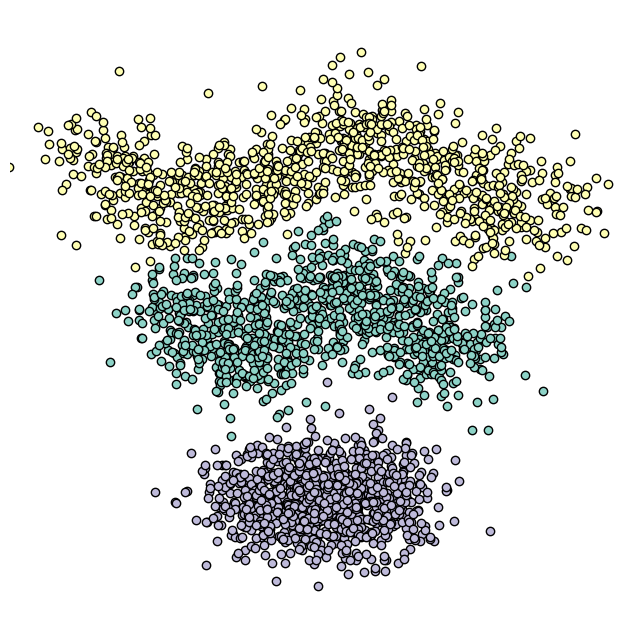

Adjusted Rand Index (ARI): 0.9586
Normalized Mutual Information (NMI): 0.9321


In [7]:
# PSM step
sigma = 0.3  # Set neighborhood radius for PSM
R = utils.angle_to_cos_sin(X)  # Convert angle values to cosine-sine pairs
subm = psm(R, sigma, 5, rho=0.001, e_n=2 * n_features - 1)  # Apply PSM algorithm
c = utils.cos_sin_to_angle(subm)  # Convert back to angle representation
c_1 = (c + 2 * PI) % (2 * PI)    # Adjust angles to be in the range [0, 2π]

# DBSCAN clustering on the PSM processed data
min_samples = 50  # Minimum samples required for DBSCAN neighborhood
# utils.plot_k_distance(c_1, min_samples)  # Plot k-distance graph to help select eps
eps = 0.35  # Set epsilon neighborhood parameter for DBSCAN

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
clusters = dbscan.fit_predict(c_1)

# Identify noise points (label -1) and inliers (normal clusters)
mask_inliers = clusters != -1
mask_outliers = clusters == -1

X_inliers = c_1[mask_inliers]
clusters_inliers = clusters[mask_inliers]
X_outliers = c_1[mask_outliers]

# Use k-Nearest Neighbors to reclassify the outliers using inliers as training data
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_inliers, clusters_inliers)
predicted_clusters_outliers = knn.predict(X_outliers)

# Update the original cluster labels with the predicted labels for outliers
final_clusters = clusters.copy()
final_clusters[mask_outliers] = predicted_clusters_outliers

# Visualization of the final clustering results
if X.shape[1] > 2:
    plt.figure(figsize=(8, 8))
    unique_clusters = np.unique(final_clusters)
    # Plot each cluster in the t-SNE reduced space
    for cluster in unique_clusters:
        plt.scatter(
            X_tsne[final_clusters == cluster, 0],
            X_tsne[final_clusters == cluster, 1],
            color=colors[cluster],
            label=f"Cluster {cluster}",            
            edgecolors="black"
        )
    plt.xlabel('t-SNE 1')
    plt.ylabel('t-SNE 2')
    plt.axis('off')
    plt.show()
else:
    # If data is 2D, visualize directly
    plt.figure(figsize=(8, 8))
    unique_clusters = np.unique(final_clusters)   
    for cluster in unique_clusters:
        plt.scatter(
            X[final_clusters == cluster, 0],
            X[final_clusters == cluster, 1],
            color=colors[cluster],
            label=f"Cluster {cluster}",
            edgecolors="black"
        )
    plt.xlim(0, 2 * np.pi)
    plt.ylim(0, 2 * np.pi)
    plt.axis('off')
    plt.show()

# Compute evaluation metrics: Adjusted Rand Index (ARI) and Normalized Mutual Information (NMI)
ari = metrics.adjusted_rand_score(true_labels, final_clusters)
print(f"Adjusted Rand Index (ARI): {ari:.4f}")

nmi = metrics.normalized_mutual_info_score(true_labels, final_clusters)
print(f"Normalized Mutual Information (NMI): {nmi:.4f}")

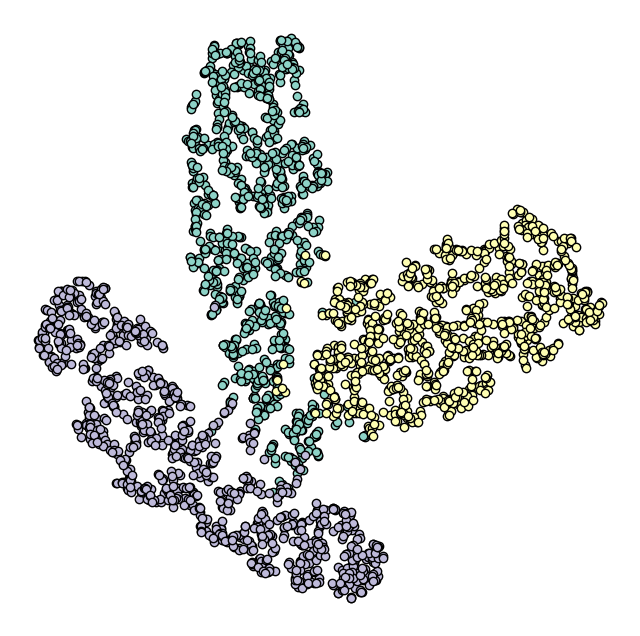

In [8]:
n_features = 3               # Set number of features/dimensions
case = 1                     # Select case 2 for data generation
n_samples = 1000             # Number of samples per cluster
noise_level = 0.15            # Noise level for the data

# Generate clustering data with n_features dimensions
X, true_labels = utils.data_generator_cl(n_features, case, n_samples, noise_level=noise_level)

unique_true_labels = np.unique(true_labels)
if X.shape[1] > 2:
    # If the data has more than 2 dimensions, use t-SNE to reduce to 2D for visualization
    tsne = TSNE(n_components=2, perplexity=30, n_iter=500, init='pca', random_state=42)
    X_tsne = tsne.fit_transform(X)
    
    # Plot t-SNE visualization
    plt.figure(figsize=(8, 8))
    # Plot each cluster manually and add legend
    for i, true_label in zip(range(0, 5 * n_samples, n_samples), unique_true_labels):
        plt.scatter(X_tsne[true_labels == true_label, 0], 
                    X_tsne[true_labels == true_label, 1], 
                    color=colors[true_label], 
                    edgecolors="black")   

    plt.xlabel('t-SNE 1')
    plt.ylabel('t-SNE 2')
    plt.axis('off')
    plt.show()
else:
    # If data is 2D, plot directly without t-SNE
    plt.figure(figsize=(8, 8))
    for i, true_label in zip(range(0, 5 * n_samples, n_samples), unique_true_labels):
        plt.scatter(X[true_labels == true_label, 0], 
                    X[true_labels == true_label, 1], 
                    color=colors[true_label], 
                    edgecolors="black")    
    plt.xlim(0, 2 * np.pi)
    plt.ylim(0, 2 * np.pi)
    plt.axis('off')
    plt.show()

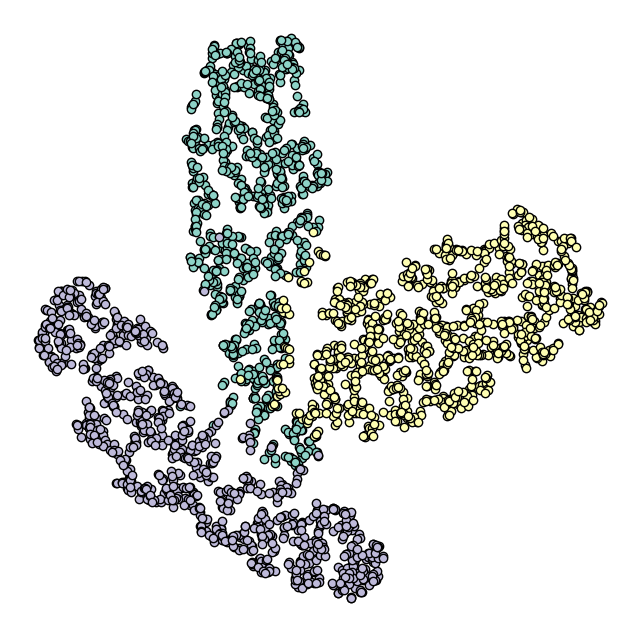

Adjusted Rand Index (ARI): 0.9076
Normalized Mutual Information (NMI): 0.8763


In [9]:
# PSM step
sigma = 0.25  # Set neighborhood radius for PSM
R = utils.angle_to_cos_sin(X)  # Convert angle values to cosine-sine pairs
subm = psm(R, sigma, 5, rho=0.001, e_n=2 * n_features - 1)  # Apply PSM algorithm
c = utils.cos_sin_to_angle(subm)  # Convert back to angle representation
c_1 = (c + 2 * PI) % (2 * PI)    # Adjust angles to be in the range [0, 2π]

# DBSCAN clustering on the PSM processed data
min_samples = 20  # Minimum samples required for DBSCAN neighborhood
# utils.plot_k_distance(c_1, min_samples)  # Plot k-distance graph to help select eps
eps = 0.1  # Set epsilon neighborhood parameter for DBSCAN

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
clusters = dbscan.fit_predict(c_1)

# Identify noise points (label -1) and inliers (normal clusters)
mask_inliers = clusters != -1
mask_outliers = clusters == -1

X_inliers = c_1[mask_inliers]
clusters_inliers = clusters[mask_inliers]
X_outliers = c_1[mask_outliers]

# Use k-Nearest Neighbors to reclassify the outliers using inliers as training data
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_inliers, clusters_inliers)
predicted_clusters_outliers = knn.predict(X_outliers)

# Update the original cluster labels with the predicted labels for outliers
final_clusters = clusters.copy()
final_clusters[mask_outliers] = predicted_clusters_outliers

# Visualization of the final clustering results
if X.shape[1] > 2:
    plt.figure(figsize=(8, 8))
    unique_clusters = np.unique(final_clusters)
    # Plot each cluster in the t-SNE reduced space
    for cluster in unique_clusters:
        plt.scatter(
            X_tsne[final_clusters == cluster, 0],
            X_tsne[final_clusters == cluster, 1],
            color=colors[cluster],
            label=f"Cluster {cluster}",            
            edgecolors="black"
        )
    plt.xlabel('t-SNE 1')
    plt.ylabel('t-SNE 2')
    plt.axis('off')
    plt.show()
else:
    # If data is 2D, visualize directly
    plt.figure(figsize=(8, 8))
    unique_clusters = np.unique(final_clusters)   
    for cluster in unique_clusters:
        plt.scatter(
            X[final_clusters == cluster, 0],
            X[final_clusters == cluster, 1],
            color=colors[cluster],
            label=f"Cluster {cluster}",
            edgecolors="black"
        )
    plt.xlim(0, 2 * np.pi)
    plt.ylim(0, 2 * np.pi)
    plt.axis('off')
    plt.show()

# Compute evaluation metrics: Adjusted Rand Index (ARI) and Normalized Mutual Information (NMI)
ari = metrics.adjusted_rand_score(true_labels, final_clusters)
print(f"Adjusted Rand Index (ARI): {ari:.4f}")

nmi = metrics.normalized_mutual_info_score(true_labels, final_clusters)
print(f"Normalized Mutual Information (NMI): {nmi:.4f}")

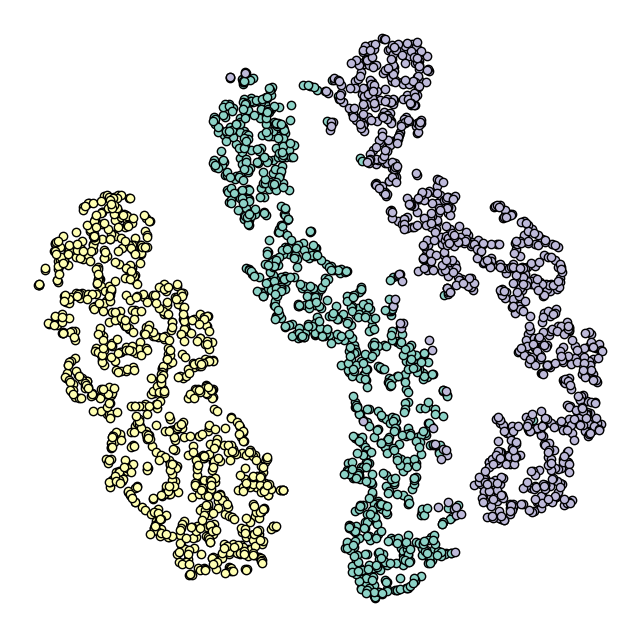

In [10]:
n_features = 3               # Set number of features/dimensions
case = 2                     # Select case 2 for data generation
n_samples = 1000             # Number of samples per cluster
noise_level = 0.2            # Noise level for the data

# Generate clustering data with n_features dimensions
X, true_labels = utils.data_generator_cl(n_features, case, n_samples, noise_level=noise_level)

unique_true_labels = np.unique(true_labels)
if X.shape[1] > 2:
    # If the data has more than 2 dimensions, use t-SNE to reduce to 2D for visualization
    tsne = TSNE(n_components=2, perplexity=30, n_iter=500, init='pca', random_state=42)
    X_tsne = tsne.fit_transform(X)
    
    # Plot t-SNE visualization
    plt.figure(figsize=(8, 8))
    # Plot each cluster manually and add legend
    for i, true_label in zip(range(0, 5 * n_samples, n_samples), unique_true_labels):
        plt.scatter(X_tsne[true_labels == true_label, 0], 
                    X_tsne[true_labels == true_label, 1], 
                    color=colors[true_label], 
                    edgecolors="black")   

    plt.xlabel('t-SNE 1')
    plt.ylabel('t-SNE 2')
    plt.axis('off')
    plt.show()
else:
    # If data is 2D, plot directly without t-SNE
    plt.figure(figsize=(8, 8))
    for i, true_label in zip(range(0, 5 * n_samples, n_samples), unique_true_labels):
        plt.scatter(X[true_labels == true_label, 0], 
                    X[true_labels == true_label, 1], 
                    color=colors[true_label], 
                    edgecolors="black")    
    plt.xlim(0, 2 * np.pi)
    plt.ylim(0, 2 * np.pi)
    plt.axis('off')
    plt.show()

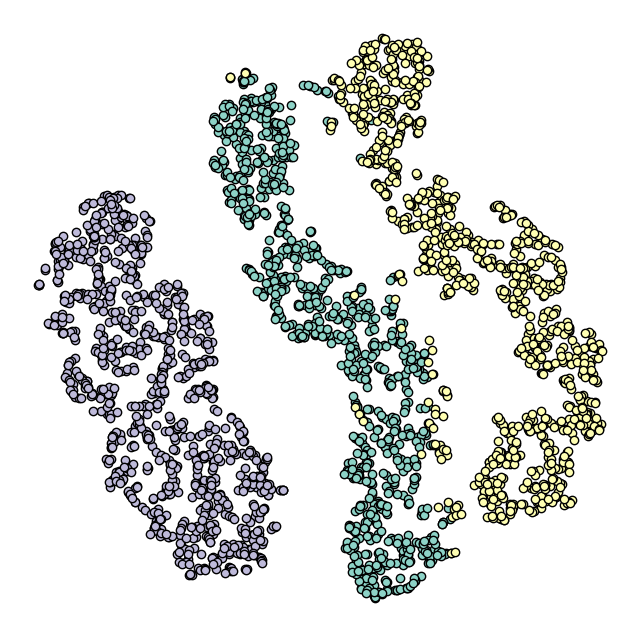

Adjusted Rand Index (ARI): 0.9607
Normalized Mutual Information (NMI): 0.9415


In [11]:
# PSM step
sigma = 0.4  # Set neighborhood radius for PSM
R = utils.angle_to_cos_sin(X)  # Convert angle values to cosine-sine pairs
subm = psm(R, sigma, 5, rho=0.001, e_n=2 * n_features - 1)  # Apply PSM algorithm
c = utils.cos_sin_to_angle(subm)  # Convert back to angle representation
c_1 = (c + 2 * PI) % (2 * PI)    # Adjust angles to be in the range [0, 2π]

# DBSCAN clustering on the PSM processed data
min_samples = 20  # Minimum samples required for DBSCAN neighborhood
# utils.plot_k_distance(c_1, min_samples)  # Plot k-distance graph to help select eps
eps = 0.1  # Set epsilon neighborhood parameter for DBSCAN

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
clusters = dbscan.fit_predict(c_1)

# Identify noise points (label -1) and inliers (normal clusters)
mask_inliers = clusters != -1
mask_outliers = clusters == -1

X_inliers = c_1[mask_inliers]
clusters_inliers = clusters[mask_inliers]
X_outliers = c_1[mask_outliers]

# Use k-Nearest Neighbors to reclassify the outliers using inliers as training data
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_inliers, clusters_inliers)
predicted_clusters_outliers = knn.predict(X_outliers)

# Update the original cluster labels with the predicted labels for outliers
final_clusters = clusters.copy()
final_clusters[mask_outliers] = predicted_clusters_outliers

# Visualization of the final clustering results
if X.shape[1] > 2:
    plt.figure(figsize=(8, 8))
    unique_clusters = np.unique(final_clusters)
    # Plot each cluster in the t-SNE reduced space
    for cluster in unique_clusters:
        plt.scatter(
            X_tsne[final_clusters == cluster, 0],
            X_tsne[final_clusters == cluster, 1],
            color=colors[cluster],
            label=f"Cluster {cluster}",            
            edgecolors="black"
        )
    plt.xlabel('t-SNE 1')
    plt.ylabel('t-SNE 2')
    plt.axis('off')
    plt.show()
else:
    # If data is 2D, visualize directly
    plt.figure(figsize=(8, 8))
    unique_clusters = np.unique(final_clusters)   
    for cluster in unique_clusters:
        plt.scatter(
            X[final_clusters == cluster, 0],
            X[final_clusters == cluster, 1],
            color=colors[cluster],
            label=f"Cluster {cluster}",
            edgecolors="black"
        )
    plt.xlim(0, 2 * np.pi)
    plt.ylim(0, 2 * np.pi)
    plt.axis('off')
    plt.show()

# Compute evaluation metrics: Adjusted Rand Index (ARI) and Normalized Mutual Information (NMI)
ari = metrics.adjusted_rand_score(true_labels, final_clusters)
print(f"Adjusted Rand Index (ARI): {ari:.4f}")

nmi = metrics.normalized_mutual_info_score(true_labels, final_clusters)
print(f"Normalized Mutual Information (NMI): {nmi:.4f}")

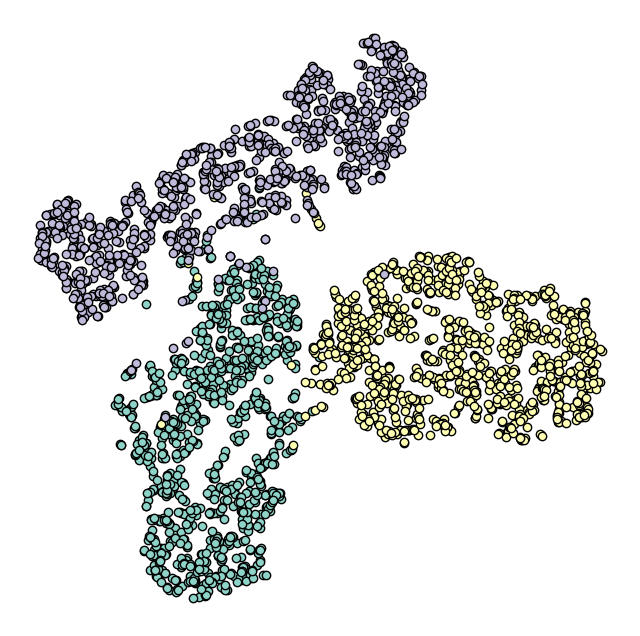

In [12]:
n_features = 4               # Set number of features/dimensions
case = 1                     # Select case 2 for data generation
n_samples = 1000             # Number of samples per cluster
noise_level = 0.4            # Noise level for the data

# Generate clustering data with n_features dimensions
X, true_labels = utils.data_generator_cl(n_features, case, n_samples, noise_level=noise_level)

unique_true_labels = np.unique(true_labels)
if X.shape[1] > 2:
    # If the data has more than 2 dimensions, use t-SNE to reduce to 2D for visualization
    tsne = TSNE(n_components=2, perplexity=30, n_iter=500, init='pca', random_state=42)
    X_tsne = tsne.fit_transform(X)
    
    # Plot t-SNE visualization
    plt.figure(figsize=(8, 8))
    # Plot each cluster manually and add legend
    for i, true_label in zip(range(0, 5 * n_samples, n_samples), unique_true_labels):
        plt.scatter(X_tsne[true_labels == true_label, 0], 
                    X_tsne[true_labels == true_label, 1], 
                    color=colors[true_label], 
                    edgecolors="black")   

    plt.xlabel('t-SNE 1')
    plt.ylabel('t-SNE 2')
    plt.axis('off')
    plt.show()
else:
    # If data is 2D, plot directly without t-SNE
    plt.figure(figsize=(8, 8))
    for i, true_label in zip(range(0, 5 * n_samples, n_samples), unique_true_labels):
        plt.scatter(X[true_labels == true_label, 0], 
                    X[true_labels == true_label, 1], 
                    color=colors[true_label], 
                    edgecolors="black")    
    plt.xlim(0, 2 * np.pi)
    plt.ylim(0, 2 * np.pi)
    plt.axis('off')
    plt.show()

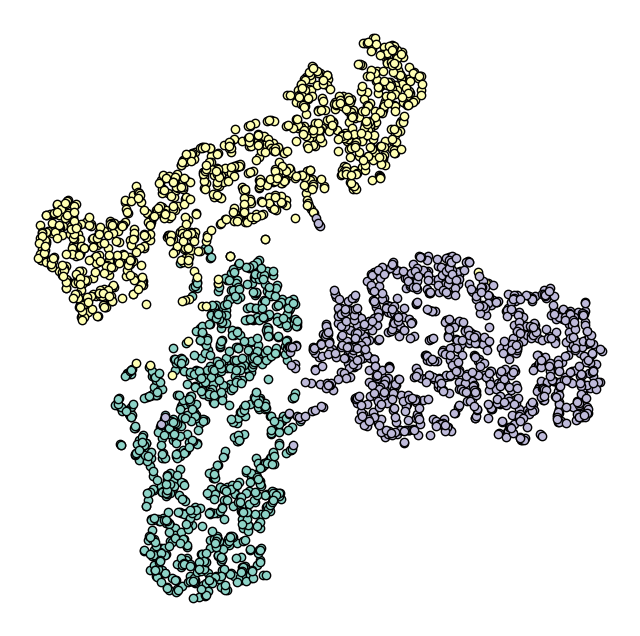

Adjusted Rand Index (ARI): 0.9390
Normalized Mutual Information (NMI): 0.9018


In [13]:
# PSM step
sigma = 0.6  # Set neighborhood radius for PSM
R = utils.angle_to_cos_sin(X)  # Convert angle values to cosine-sine pairs
subm = psm(R, sigma, 5, rho=0.001, e_n=2 * n_features - 1)  # Apply PSM algorithm
c = utils.cos_sin_to_angle(subm)  # Convert back to angle representation
c_1 = (c + 2 * PI) % (2 * PI)    # Adjust angles to be in the range [0, 2π]

# DBSCAN clustering on the PSM processed data
min_samples = 40  # Minimum samples required for DBSCAN neighborhood
# utils.plot_k_distance(c_1, min_samples)  # Plot k-distance graph to help select eps
eps = 0.3  # Set epsilon neighborhood parameter for DBSCAN

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
clusters = dbscan.fit_predict(c_1)

# Identify noise points (label -1) and inliers (normal clusters)
mask_inliers = clusters != -1
mask_outliers = clusters == -1

X_inliers = c_1[mask_inliers]
clusters_inliers = clusters[mask_inliers]
X_outliers = c_1[mask_outliers]

# Use k-Nearest Neighbors to reclassify the outliers using inliers as training data
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_inliers, clusters_inliers)
predicted_clusters_outliers = knn.predict(X_outliers)

# Update the original cluster labels with the predicted labels for outliers
final_clusters = clusters.copy()
final_clusters[mask_outliers] = predicted_clusters_outliers

# Visualization of the final clustering results
if X.shape[1] > 2:
    plt.figure(figsize=(8, 8))
    unique_clusters = np.unique(final_clusters)
    # Plot each cluster in the t-SNE reduced space
    for cluster in unique_clusters:
        plt.scatter(
            X_tsne[final_clusters == cluster, 0],
            X_tsne[final_clusters == cluster, 1],
            color=colors[cluster],
            label=f"Cluster {cluster}",            
            edgecolors="black"
        )
    plt.xlabel('t-SNE 1')
    plt.ylabel('t-SNE 2')
    plt.axis('off')
    plt.show()
else:
    # If data is 2D, visualize directly
    plt.figure(figsize=(8, 8))
    unique_clusters = np.unique(final_clusters)   
    for cluster in unique_clusters:
        plt.scatter(
            X[final_clusters == cluster, 0],
            X[final_clusters == cluster, 1],
            color=colors[cluster],
            label=f"Cluster {cluster}",
            edgecolors="black"
        )
    plt.xlim(0, 2 * np.pi)
    plt.ylim(0, 2 * np.pi)
    plt.axis('off')
    plt.show()

# Compute evaluation metrics: Adjusted Rand Index (ARI) and Normalized Mutual Information (NMI)
ari = metrics.adjusted_rand_score(true_labels, final_clusters)
print(f"Adjusted Rand Index (ARI): {ari:.4f}")

nmi = metrics.normalized_mutual_info_score(true_labels, final_clusters)
print(f"Normalized Mutual Information (NMI): {nmi:.4f}")

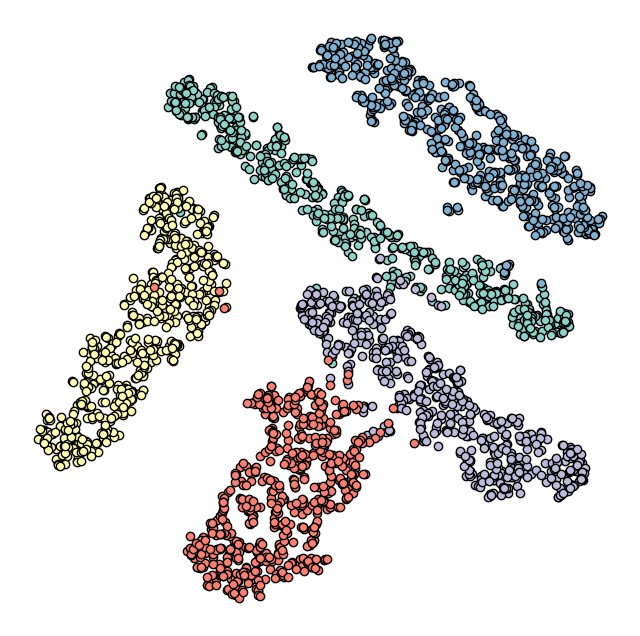

In [14]:
n_features = 4               # Set number of features/dimensions
case = 2                     # Select case 2 for data generation
n_samples = 600             # Number of samples per cluster
noise_level = 0.3            # Noise level for the data

# Generate clustering data with n_features dimensions
X, true_labels = utils.data_generator_cl(n_features, case, n_samples, noise_level=noise_level)

unique_true_labels = np.unique(true_labels)
if X.shape[1] > 2:
    # If the data has more than 2 dimensions, use t-SNE to reduce to 2D for visualization
    tsne = TSNE(n_components=2, perplexity=30, n_iter=500, init='pca', random_state=42)
    X_tsne = tsne.fit_transform(X)
    
    # Plot t-SNE visualization
    plt.figure(figsize=(8, 8))
    # Plot each cluster manually and add legend
    for i, true_label in zip(range(0, 5 * n_samples, n_samples), unique_true_labels):
        plt.scatter(X_tsne[true_labels == true_label, 0], 
                    X_tsne[true_labels == true_label, 1], 
                    color=colors[true_label], 
                    edgecolors="black")   

    plt.xlabel('t-SNE 1')
    plt.ylabel('t-SNE 2')
    plt.axis('off')
    plt.show()
else:
    # If data is 2D, plot directly without t-SNE
    plt.figure(figsize=(8, 8))
    for i, true_label in zip(range(0, 5 * n_samples, n_samples), unique_true_labels):
        plt.scatter(X[true_labels == true_label, 0], 
                    X[true_labels == true_label, 1], 
                    color=colors[true_label], 
                    edgecolors="black")    
    plt.xlim(0, 2 * np.pi)
    plt.ylim(0, 2 * np.pi)
    plt.axis('off')
    plt.show()

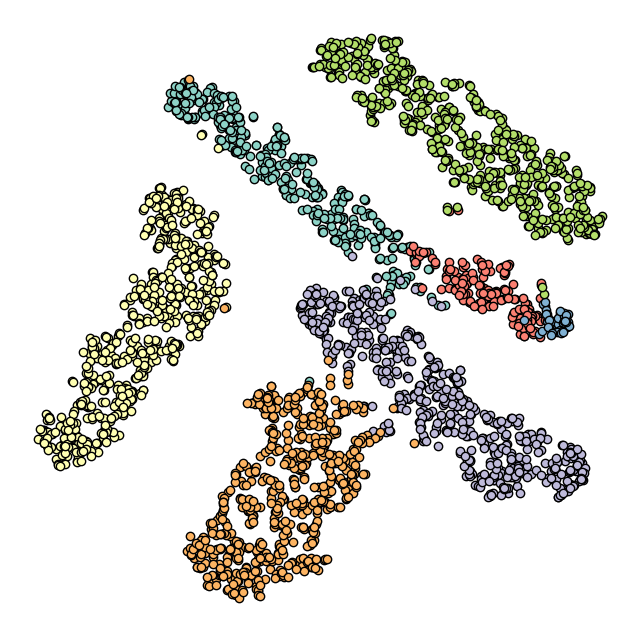

Adjusted Rand Index (ARI): 0.9085
Normalized Mutual Information (NMI): 0.9074


In [15]:
# PSM step
sigma = 0.6  # Set neighborhood radius for PSM
R = utils.angle_to_cos_sin(X)  # Convert angle values to cosine-sine pairs
subm = psm(R, sigma, 5, rho=0.001, e_n=2 * n_features - 1)  # Apply PSM algorithm
c = utils.cos_sin_to_angle(subm)  # Convert back to angle representation
c_1 = (c + 2 * PI) % (2 * PI)    # Adjust angles to be in the range [0, 2π]

# DBSCAN clustering on the PSM processed data
min_samples = 40  # Minimum samples required for DBSCAN neighborhood
# utils.plot_k_distance(c_1, min_samples)  # Plot k-distance graph to help select eps
eps = 0.25  # Set epsilon neighborhood parameter for DBSCAN

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
clusters = dbscan.fit_predict(c_1)

# Identify noise points (label -1) and inliers (normal clusters)
mask_inliers = clusters != -1
mask_outliers = clusters == -1

X_inliers = c_1[mask_inliers]
clusters_inliers = clusters[mask_inliers]
X_outliers = c_1[mask_outliers]

# Use k-Nearest Neighbors to reclassify the outliers using inliers as training data
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_inliers, clusters_inliers)
predicted_clusters_outliers = knn.predict(X_outliers)

# Update the original cluster labels with the predicted labels for outliers
final_clusters = clusters.copy()
final_clusters[mask_outliers] = predicted_clusters_outliers

# Visualization of the final clustering results
if X.shape[1] > 2:
    plt.figure(figsize=(8, 8))
    unique_clusters = np.unique(final_clusters)
    # Plot each cluster in the t-SNE reduced space
    for cluster in unique_clusters:
        plt.scatter(
            X_tsne[final_clusters == cluster, 0],
            X_tsne[final_clusters == cluster, 1],
            color=colors[cluster],
            label=f"Cluster {cluster}",            
            edgecolors="black"
        )
    plt.xlabel('t-SNE 1')
    plt.ylabel('t-SNE 2')
    plt.axis('off')
    plt.show()
else:
    # If data is 2D, visualize directly
    plt.figure(figsize=(8, 8))
    unique_clusters = np.unique(final_clusters)   
    for cluster in unique_clusters:
        plt.scatter(
            X[final_clusters == cluster, 0],
            X[final_clusters == cluster, 1],
            color=colors[cluster],
            label=f"Cluster {cluster}",
            edgecolors="black"
        )
    plt.xlim(0, 2 * np.pi)
    plt.ylim(0, 2 * np.pi)
    plt.axis('off')
    plt.show()

# Compute evaluation metrics: Adjusted Rand Index (ARI) and Normalized Mutual Information (NMI)
ari = metrics.adjusted_rand_score(true_labels, final_clusters)
print(f"Adjusted Rand Index (ARI): {ari:.4f}")

nmi = metrics.normalized_mutual_info_score(true_labels, final_clusters)
print(f"Normalized Mutual Information (NMI): {nmi:.4f}")

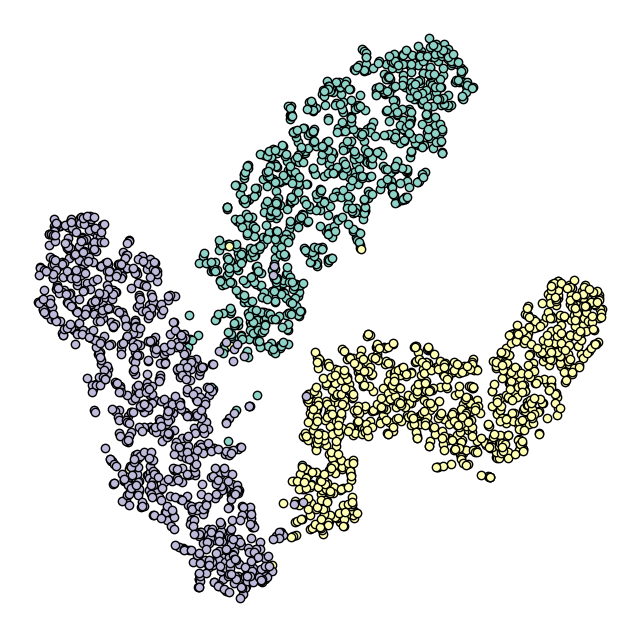

In [16]:
n_features = 5               # Set number of features/dimensions
case = 1                     # Select case 2 for data generation
n_samples = 1000             # Number of samples per cluster
noise_level = 0.4            # Noise level for the data

# Generate clustering data with n_features dimensions
X, true_labels = utils.data_generator_cl(n_features, case, n_samples, noise_level=noise_level)

unique_true_labels = np.unique(true_labels)
if X.shape[1] > 2:
    # If the data has more than 2 dimensions, use t-SNE to reduce to 2D for visualization
    tsne = TSNE(n_components=2, perplexity=30, n_iter=500, init='pca', random_state=42)
    X_tsne = tsne.fit_transform(X)
    
    # Plot t-SNE visualization
    plt.figure(figsize=(8, 8))
    # Plot each cluster manually and add legend
    for i, true_label in zip(range(0, 5 * n_samples, n_samples), unique_true_labels):
        plt.scatter(X_tsne[true_labels == true_label, 0], 
                    X_tsne[true_labels == true_label, 1], 
                    color=colors[true_label], 
                    edgecolors="black")   

    plt.xlabel('t-SNE 1')
    plt.ylabel('t-SNE 2')
    plt.axis('off')
    plt.show()
else:
    # If data is 2D, plot directly without t-SNE
    plt.figure(figsize=(8, 8))
    for i, true_label in zip(range(0, 5 * n_samples, n_samples), unique_true_labels):
        plt.scatter(X[true_labels == true_label, 0], 
                    X[true_labels == true_label, 1], 
                    color=colors[true_label], 
                    edgecolors="black")    
    plt.xlim(0, 2 * np.pi)
    plt.ylim(0, 2 * np.pi)
    plt.axis('off')
    plt.show()

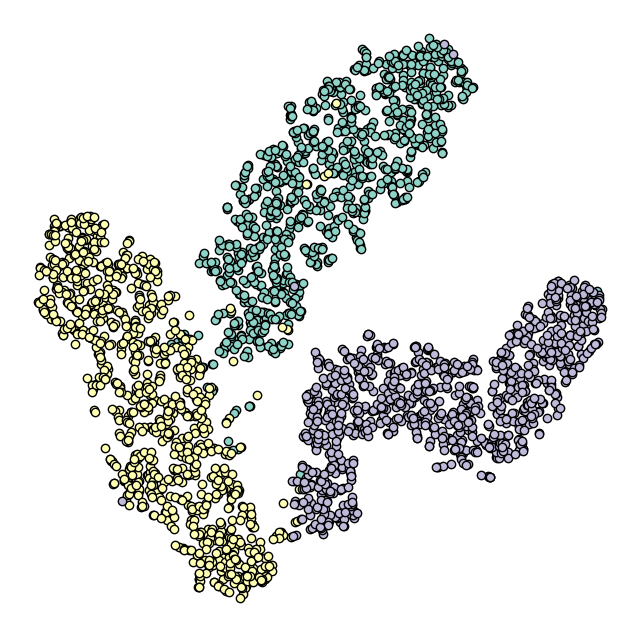

Adjusted Rand Index (ARI): 0.9266
Normalized Mutual Information (NMI): 0.8835


In [17]:
# PSM step
sigma = 0.6  # Set neighborhood radius for PSM
R = utils.angle_to_cos_sin(X)  # Convert angle values to cosine-sine pairs
subm = psm(R, sigma, 5, rho=0.001, e_n=2 * n_features - 1)  # Apply PSM algorithm
c = utils.cos_sin_to_angle(subm)  # Convert back to angle representation
c_1 = (c + 2 * PI) % (2 * PI)    # Adjust angles to be in the range [0, 2π]

# DBSCAN clustering on the PSM processed data
min_samples = 30  # Minimum samples required for DBSCAN neighborhood
# utils.plot_k_distance(c_1, min_samples)  # Plot k-distance graph to help select eps
eps = 0.3  # Set epsilon neighborhood parameter for DBSCAN

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
clusters = dbscan.fit_predict(c_1)

# Identify noise points (label -1) and inliers (normal clusters)
mask_inliers = clusters != -1
mask_outliers = clusters == -1

X_inliers = c_1[mask_inliers]
clusters_inliers = clusters[mask_inliers]
X_outliers = c_1[mask_outliers]

# Use k-Nearest Neighbors to reclassify the outliers using inliers as training data
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_inliers, clusters_inliers)
predicted_clusters_outliers = knn.predict(X_outliers)

# Update the original cluster labels with the predicted labels for outliers
final_clusters = clusters.copy()
final_clusters[mask_outliers] = predicted_clusters_outliers

# Visualization of the final clustering results
if X.shape[1] > 2:
    plt.figure(figsize=(8, 8))
    unique_clusters = np.unique(final_clusters)
    # Plot each cluster in the t-SNE reduced space
    for cluster in unique_clusters:
        plt.scatter(
            X_tsne[final_clusters == cluster, 0],
            X_tsne[final_clusters == cluster, 1],
            color=colors[cluster],
            label=f"Cluster {cluster}",            
            edgecolors="black"
        )
    plt.xlabel('t-SNE 1')
    plt.ylabel('t-SNE 2')
    plt.axis('off')
    plt.show()
else:
    # If data is 2D, visualize directly
    plt.figure(figsize=(8, 8))
    unique_clusters = np.unique(final_clusters)   
    for cluster in unique_clusters:
        plt.scatter(
            X[final_clusters == cluster, 0],
            X[final_clusters == cluster, 1],
            color=colors[cluster],
            label=f"Cluster {cluster}",
            edgecolors="black"
        )
    plt.xlim(0, 2 * np.pi)
    plt.ylim(0, 2 * np.pi)
    plt.axis('off')
    plt.show()

# Compute evaluation metrics: Adjusted Rand Index (ARI) and Normalized Mutual Information (NMI)
ari = metrics.adjusted_rand_score(true_labels, final_clusters)
print(f"Adjusted Rand Index (ARI): {ari:.4f}")

nmi = metrics.normalized_mutual_info_score(true_labels, final_clusters)
print(f"Normalized Mutual Information (NMI): {nmi:.4f}")

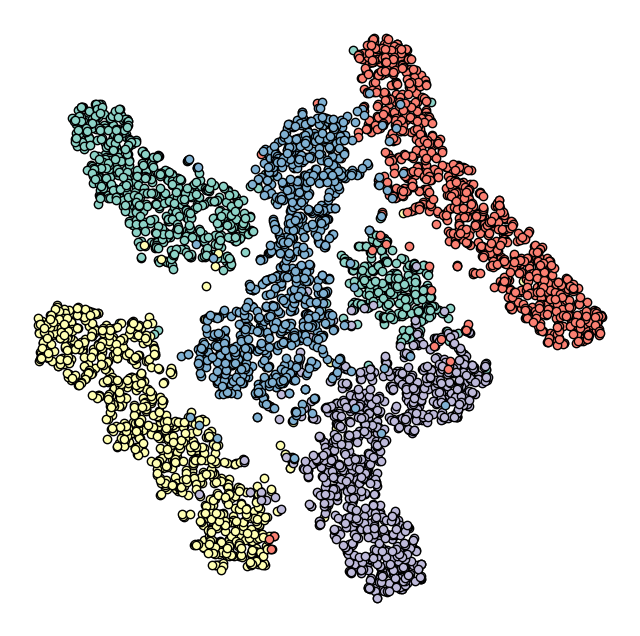

In [18]:
n_features = 5               # Set number of features/dimensions
case = 2                     # Select case 2 for data generation
n_samples = 1000             # Number of samples per cluster
noise_level = 0.4            # Noise level for the data

# Generate clustering data with n_features dimensions
X, true_labels = utils.data_generator_cl(n_features, case, n_samples, noise_level=noise_level)

unique_true_labels = np.unique(true_labels)
if X.shape[1] > 2:
    # If the data has more than 2 dimensions, use t-SNE to reduce to 2D for visualization
    tsne = TSNE(n_components=2, perplexity=30, n_iter=500, init='pca', random_state=42)
    X_tsne = tsne.fit_transform(X)
    
    # Plot t-SNE visualization
    plt.figure(figsize=(8, 8))
    # Plot each cluster manually and add legend
    for i, true_label in zip(range(0, 5 * n_samples, n_samples), unique_true_labels):
        plt.scatter(X_tsne[true_labels == true_label, 0], 
                    X_tsne[true_labels == true_label, 1], 
                    color=colors[true_label], 
                    edgecolors="black")   

    plt.xlabel('t-SNE 1')
    plt.ylabel('t-SNE 2')
    plt.axis('off')
    plt.show()
else:
    # If data is 2D, plot directly without t-SNE
    plt.figure(figsize=(8, 8))
    for i, true_label in zip(range(0, 5 * n_samples, n_samples), unique_true_labels):
        plt.scatter(X[true_labels == true_label, 0], 
                    X[true_labels == true_label, 1], 
                    color=colors[true_label], 
                    edgecolors="black")    
    plt.xlim(0, 2 * np.pi)
    plt.ylim(0, 2 * np.pi)
    plt.axis('off')
    plt.show()

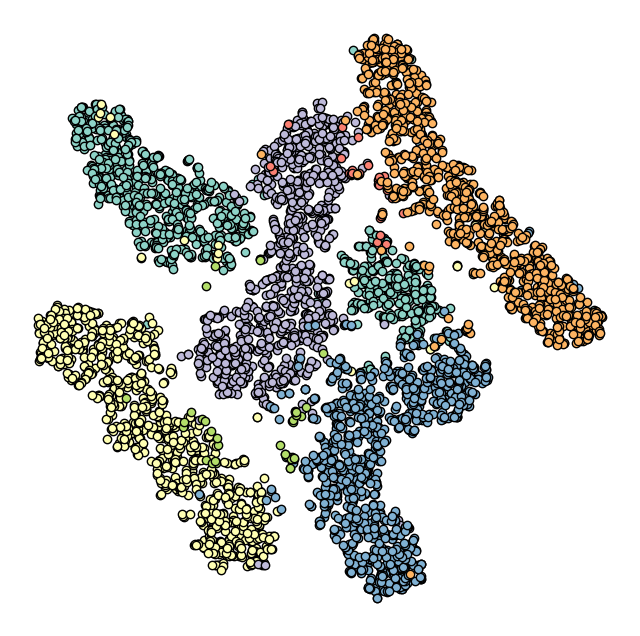

Adjusted Rand Index (ARI): 0.8698
Normalized Mutual Information (NMI): 0.8247


In [19]:
# PSM step
sigma = 0.6  # Set neighborhood radius for PSM
R = utils.angle_to_cos_sin(X)  # Convert angle values to cosine-sine pairs
subm = psm(R, sigma, 5, rho=0.001, e_n=2 * n_features - 1)  # Apply PSM algorithm
c = utils.cos_sin_to_angle(subm)  # Convert back to angle representation
c_1 = (c + 2 * PI) % (2 * PI)    # Adjust angles to be in the range [0, 2π]

# DBSCAN clustering on the PSM processed data
min_samples = 20  # Minimum samples required for DBSCAN neighborhood
# utils.plot_k_distance(c_1, min_samples)  # Plot k-distance graph to help select eps
eps = 0.2  # Set epsilon neighborhood parameter for DBSCAN

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
clusters = dbscan.fit_predict(c_1)

# Identify noise points (label -1) and inliers (normal clusters)
mask_inliers = clusters != -1
mask_outliers = clusters == -1

X_inliers = c_1[mask_inliers]
clusters_inliers = clusters[mask_inliers]
X_outliers = c_1[mask_outliers]

# Use k-Nearest Neighbors to reclassify the outliers using inliers as training data
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_inliers, clusters_inliers)
predicted_clusters_outliers = knn.predict(X_outliers)

# Update the original cluster labels with the predicted labels for outliers
final_clusters = clusters.copy()
final_clusters[mask_outliers] = predicted_clusters_outliers

# Visualization of the final clustering results
if X.shape[1] > 2:
    plt.figure(figsize=(8, 8))
    unique_clusters = np.unique(final_clusters)
    # Plot each cluster in the t-SNE reduced space
    for cluster in unique_clusters:
        plt.scatter(
            X_tsne[final_clusters == cluster, 0],
            X_tsne[final_clusters == cluster, 1],
            color=colors[cluster],
            label=f"Cluster {cluster}",            
            edgecolors="black"
        )
    plt.xlabel('t-SNE 1')
    plt.ylabel('t-SNE 2')
    plt.axis('off')
    plt.show()
else:
    # If data is 2D, visualize directly
    plt.figure(figsize=(8, 8))
    unique_clusters = np.unique(final_clusters)   
    for cluster in unique_clusters:
        plt.scatter(
            X[final_clusters == cluster, 0],
            X[final_clusters == cluster, 1],
            color=colors[cluster],
            label=f"Cluster {cluster}",
            edgecolors="black"
        )
    plt.xlim(0, 2 * np.pi)
    plt.ylim(0, 2 * np.pi)
    plt.axis('off')
    plt.show()

# Compute evaluation metrics: Adjusted Rand Index (ARI) and Normalized Mutual Information (NMI)
ari = metrics.adjusted_rand_score(true_labels, final_clusters)
print(f"Adjusted Rand Index (ARI): {ari:.4f}")

nmi = metrics.normalized_mutual_info_score(true_labels, final_clusters)
print(f"Normalized Mutual Information (NMI): {nmi:.4f}")

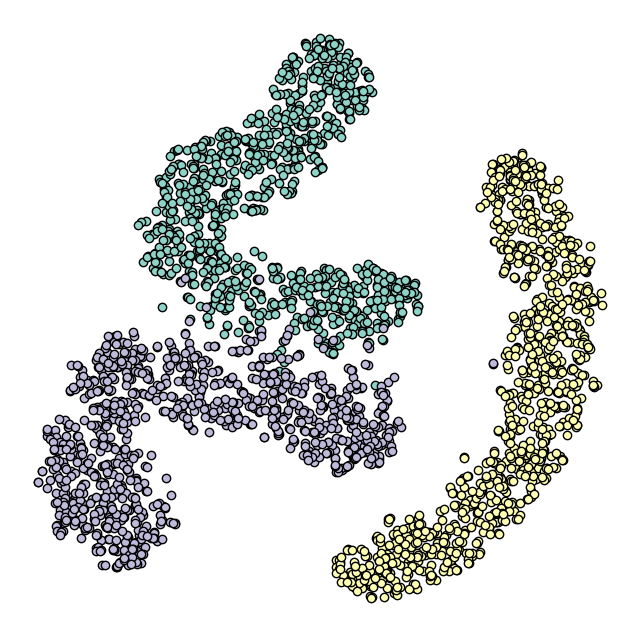

In [20]:
n_features = 6               # Set number of features/dimensions
case = 1                     # Select case 2 for data generation
n_samples = 1000             # Number of samples per cluster
noise_level = 0.3            # Noise level for the data

# Generate clustering data with n_features dimensions
X, true_labels = utils.data_generator_cl(n_features, case, n_samples, noise_level=noise_level)

unique_true_labels = np.unique(true_labels)
if X.shape[1] > 2:
    # If the data has more than 2 dimensions, use t-SNE to reduce to 2D for visualization
    tsne = TSNE(n_components=2, perplexity=30, n_iter=500, init='pca', random_state=42)
    X_tsne = tsne.fit_transform(X)
    
    # Plot t-SNE visualization
    plt.figure(figsize=(8, 8))
    # Plot each cluster manually and add legend
    for i, true_label in zip(range(0, 5 * n_samples, n_samples), unique_true_labels):
        plt.scatter(X_tsne[true_labels == true_label, 0], 
                    X_tsne[true_labels == true_label, 1], 
                    color=colors[true_label], 
                    edgecolors="black")   

    plt.xlabel('t-SNE 1')
    plt.ylabel('t-SNE 2')
    plt.axis('off')
    plt.show()
else:
    # If data is 2D, plot directly without t-SNE
    plt.figure(figsize=(8, 8))
    for i, true_label in zip(range(0, 5 * n_samples, n_samples), unique_true_labels):
        plt.scatter(X[true_labels == true_label, 0], 
                    X[true_labels == true_label, 1], 
                    color=colors[true_label], 
                    edgecolors="black")    
    plt.xlim(0, 2 * np.pi)
    plt.ylim(0, 2 * np.pi)
    plt.axis('off')
    plt.show()

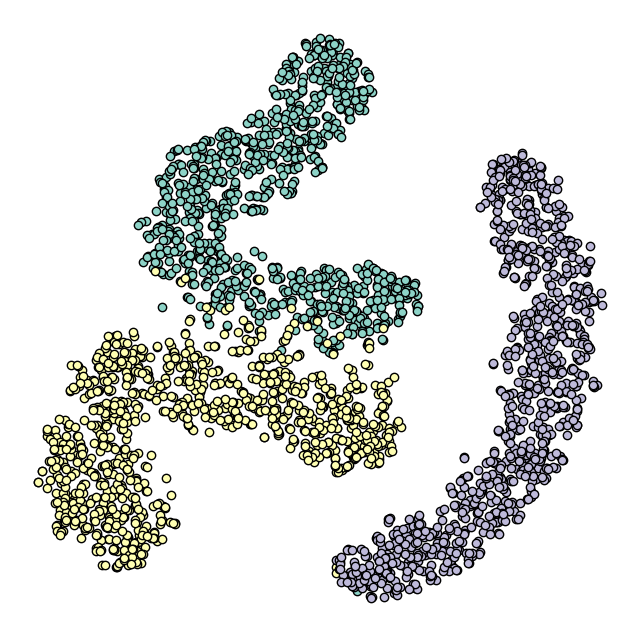

Adjusted Rand Index (ARI): 0.9606
Normalized Mutual Information (NMI): 0.9383


In [21]:
# PSM step
sigma = 0.6  # Set neighborhood radius for PSM
R = utils.angle_to_cos_sin(X)  # Convert angle values to cosine-sine pairs
subm = psm(R, sigma, 5, rho=0.001, e_n=2 * n_features - 1)  # Apply PSM algorithm
c = utils.cos_sin_to_angle(subm)  # Convert back to angle representation
c_1 = (c + 2 * PI) % (2 * PI)    # Adjust angles to be in the range [0, 2π]

# DBSCAN clustering on the PSM processed data
min_samples = 30  # Minimum samples required for DBSCAN neighborhood
# utils.plot_k_distance(c_1, min_samples)  # Plot k-distance graph to help select eps
eps = 0.2  # Set epsilon neighborhood parameter for DBSCAN

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
clusters = dbscan.fit_predict(c_1)

# Identify noise points (label -1) and inliers (normal clusters)
mask_inliers = clusters != -1
mask_outliers = clusters == -1

X_inliers = c_1[mask_inliers]
clusters_inliers = clusters[mask_inliers]
X_outliers = c_1[mask_outliers]

# Use k-Nearest Neighbors to reclassify the outliers using inliers as training data
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_inliers, clusters_inliers)
predicted_clusters_outliers = knn.predict(X_outliers)

# Update the original cluster labels with the predicted labels for outliers
final_clusters = clusters.copy()
final_clusters[mask_outliers] = predicted_clusters_outliers

# Visualization of the final clustering results
if X.shape[1] > 2:
    plt.figure(figsize=(8, 8))
    unique_clusters = np.unique(final_clusters)
    # Plot each cluster in the t-SNE reduced space
    for cluster in unique_clusters:
        plt.scatter(
            X_tsne[final_clusters == cluster, 0],
            X_tsne[final_clusters == cluster, 1],
            color=colors[cluster],
            label=f"Cluster {cluster}",            
            edgecolors="black"
        )
    plt.xlabel('t-SNE 1')
    plt.ylabel('t-SNE 2')
    plt.axis('off')
    plt.show()
else:
    # If data is 2D, visualize directly
    plt.figure(figsize=(8, 8))
    unique_clusters = np.unique(final_clusters)   
    for cluster in unique_clusters:
        plt.scatter(
            X[final_clusters == cluster, 0],
            X[final_clusters == cluster, 1],
            color=colors[cluster],
            label=f"Cluster {cluster}",
            edgecolors="black"
        )
    plt.xlim(0, 2 * np.pi)
    plt.ylim(0, 2 * np.pi)
    plt.axis('off')
    plt.show()

# Compute evaluation metrics: Adjusted Rand Index (ARI) and Normalized Mutual Information (NMI)
ari = metrics.adjusted_rand_score(true_labels, final_clusters)
print(f"Adjusted Rand Index (ARI): {ari:.4f}")

nmi = metrics.normalized_mutual_info_score(true_labels, final_clusters)
print(f"Normalized Mutual Information (NMI): {nmi:.4f}")

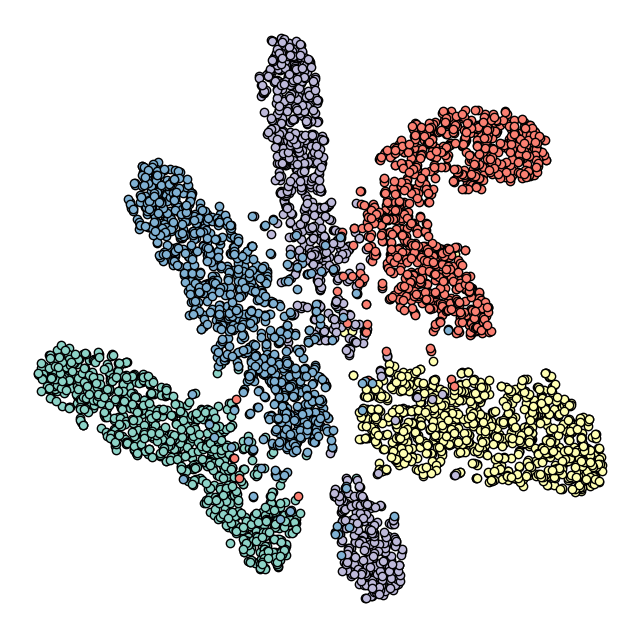

In [22]:
n_features = 6               # Set number of features/dimensions
case = 2                     # Select case 2 for data generation
n_samples = 1000             # Number of samples per cluster
noise_level = 0.4            # Noise level for the data

# Generate clustering data with n_features dimensions
X, true_labels = utils.data_generator_cl(n_features, case, n_samples, noise_level=noise_level)

unique_true_labels = np.unique(true_labels)
if X.shape[1] > 2:
    # If the data has more than 2 dimensions, use t-SNE to reduce to 2D for visualization
    tsne = TSNE(n_components=2, perplexity=30, n_iter=500, init='pca', random_state=42)
    X_tsne = tsne.fit_transform(X)
    
    # Plot t-SNE visualization
    plt.figure(figsize=(8, 8))
    # Plot each cluster manually and add legend
    for i, true_label in zip(range(0, 5 * n_samples, n_samples), unique_true_labels):
        plt.scatter(X_tsne[true_labels == true_label, 0], 
                    X_tsne[true_labels == true_label, 1], 
                    color=colors[true_label], 
                    edgecolors="black")   

    plt.xlabel('t-SNE 1')
    plt.ylabel('t-SNE 2')
    plt.axis('off')
    plt.show()
else:
    # If data is 2D, plot directly without t-SNE
    plt.figure(figsize=(8, 8))
    for i, true_label in zip(range(0, 5 * n_samples, n_samples), unique_true_labels):
        plt.scatter(X[true_labels == true_label, 0], 
                    X[true_labels == true_label, 1], 
                    color=colors[true_label], 
                    edgecolors="black")    
    plt.xlim(0, 2 * np.pi)
    plt.ylim(0, 2 * np.pi)
    plt.axis('off')
    plt.show()

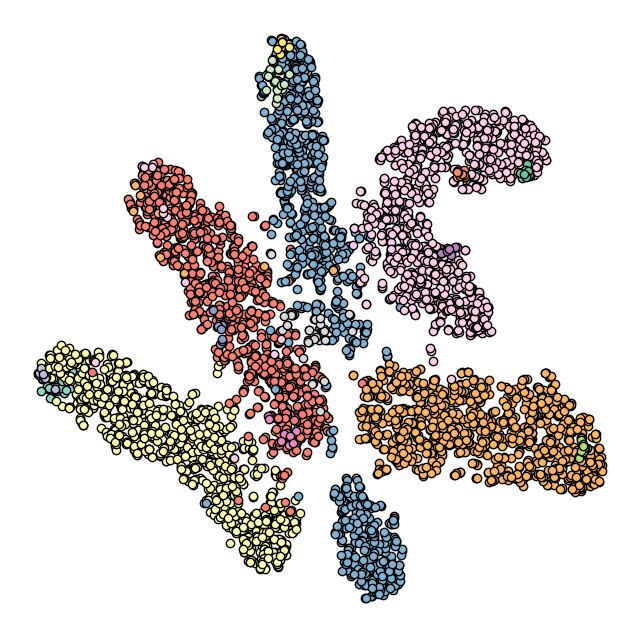

Adjusted Rand Index (ARI): 0.8560
Normalized Mutual Information (NMI): 0.8219


In [23]:
# PSM step
sigma = 0.6  # Set neighborhood radius for PSM
R = utils.angle_to_cos_sin(X)  # Convert angle values to cosine-sine pairs
subm = psm(R, sigma, 5, rho=0.001, e_n=2 * n_features - 1)  # Apply PSM algorithm
c = utils.cos_sin_to_angle(subm)  # Convert back to angle representation
c_1 = (c + 2 * PI) % (2 * PI)    # Adjust angles to be in the range [0, 2π]

# DBSCAN clustering on the PSM processed data
min_samples = 10  # Minimum samples required for DBSCAN neighborhood
# utils.plot_k_distance(c_1, min_samples)  # Plot k-distance graph to help select eps
eps = 0.15  # Set epsilon neighborhood parameter for DBSCAN

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
clusters = dbscan.fit_predict(c_1)

# Identify noise points (label -1) and inliers (normal clusters)
mask_inliers = clusters != -1
mask_outliers = clusters == -1

X_inliers = c_1[mask_inliers]
clusters_inliers = clusters[mask_inliers]
X_outliers = c_1[mask_outliers]

# Use k-Nearest Neighbors to reclassify the outliers using inliers as training data
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_inliers, clusters_inliers)
predicted_clusters_outliers = knn.predict(X_outliers)

# Update the original cluster labels with the predicted labels for outliers
final_clusters = clusters.copy()
final_clusters[mask_outliers] = predicted_clusters_outliers

# Visualization of the final clustering results
if X.shape[1] > 2:
    plt.figure(figsize=(8, 8))
    unique_clusters = np.unique(final_clusters)
    # Plot each cluster in the t-SNE reduced space
    for cluster in unique_clusters:
        plt.scatter(
            X_tsne[final_clusters == cluster, 0],
            X_tsne[final_clusters == cluster, 1],
            color=colors[cluster],
            label=f"Cluster {cluster}",            
            edgecolors="black"
        )
    plt.xlabel('t-SNE 1')
    plt.ylabel('t-SNE 2')
    plt.axis('off')
    plt.show()
else:
    # If data is 2D, visualize directly
    plt.figure(figsize=(8, 8))
    unique_clusters = np.unique(final_clusters)   
    for cluster in unique_clusters:
        plt.scatter(
            X[final_clusters == cluster, 0],
            X[final_clusters == cluster, 1],
            color=colors[cluster],
            label=f"Cluster {cluster}",
            edgecolors="black"
        )
    plt.xlim(0, 2 * np.pi)
    plt.ylim(0, 2 * np.pi)
    plt.axis('off')
    plt.show()

# Compute evaluation metrics: Adjusted Rand Index (ARI) and Normalized Mutual Information (NMI)
ari = metrics.adjusted_rand_score(true_labels, final_clusters)
print(f"Adjusted Rand Index (ARI): {ari:.4f}")

nmi = metrics.normalized_mutual_info_score(true_labels, final_clusters)
print(f"Normalized Mutual Information (NMI): {nmi:.4f}")

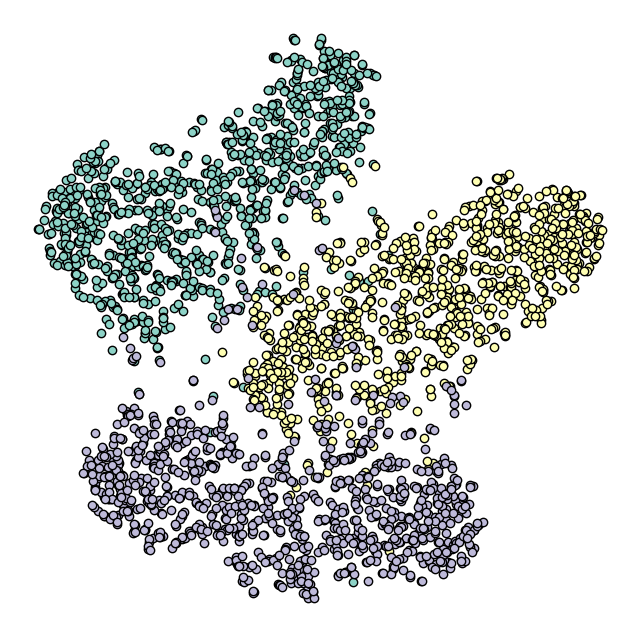

In [24]:
n_features = 7               # Set number of features/dimensions
case = 1                     # Select case 2 for data generation
n_samples = 1000             # Number of samples per cluster
noise_level = 0.5            # Noise level for the data

# Generate clustering data with n_features dimensions
X, true_labels = utils.data_generator_cl(n_features, case, n_samples, noise_level=noise_level)

unique_true_labels = np.unique(true_labels)
if X.shape[1] > 2:
    # If the data has more than 2 dimensions, use t-SNE to reduce to 2D for visualization
    tsne = TSNE(n_components=2, perplexity=30, n_iter=500, init='pca', random_state=42)
    X_tsne = tsne.fit_transform(X)
    
    # Plot t-SNE visualization
    plt.figure(figsize=(8, 8))
    # Plot each cluster manually and add legend
    for i, true_label in zip(range(0, 5 * n_samples, n_samples), unique_true_labels):
        plt.scatter(X_tsne[true_labels == true_label, 0], 
                    X_tsne[true_labels == true_label, 1], 
                    color=colors[true_label], 
                    edgecolors="black")   

    plt.xlabel('t-SNE 1')
    plt.ylabel('t-SNE 2')
    plt.axis('off')
    plt.show()
else:
    # If data is 2D, plot directly without t-SNE
    plt.figure(figsize=(8, 8))
    for i, true_label in zip(range(0, 5 * n_samples, n_samples), unique_true_labels):
        plt.scatter(X[true_labels == true_label, 0], 
                    X[true_labels == true_label, 1], 
                    color=colors[true_label], 
                    edgecolors="black")    
    plt.xlim(0, 2 * np.pi)
    plt.ylim(0, 2 * np.pi)
    plt.axis('off')
    plt.show()

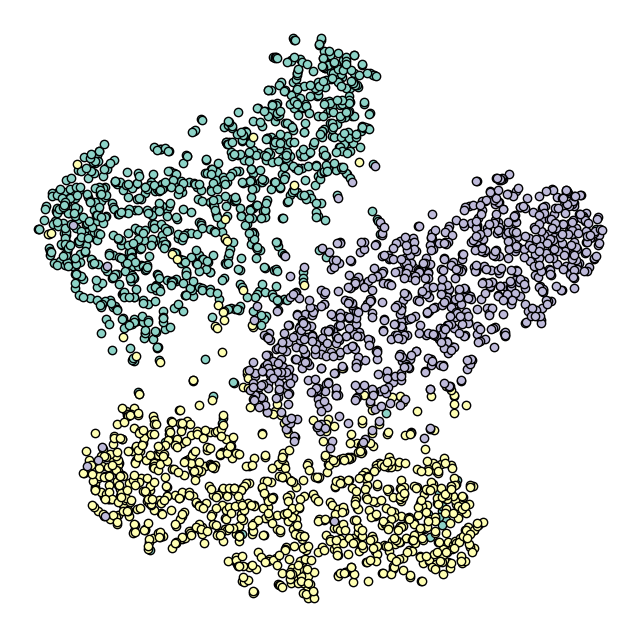

Adjusted Rand Index (ARI): 0.8246
Normalized Mutual Information (NMI): 0.7545


In [25]:
# PSM step
sigma = 0.8  # Set neighborhood radius for PSM
R = utils.angle_to_cos_sin(X)  # Convert angle values to cosine-sine pairs
subm = psm(R, sigma, 5, rho=0.001, e_n=2 * n_features - 1)  # Apply PSM algorithm
c = utils.cos_sin_to_angle(subm)  # Convert back to angle representation
c_1 = (c + 2 * PI) % (2 * PI)    # Adjust angles to be in the range [0, 2π]

# DBSCAN clustering on the PSM processed data
min_samples = 30  # Minimum samples required for DBSCAN neighborhood
# utils.plot_k_distance(c_1, min_samples)  # Plot k-distance graph to help select eps
eps = 0.25  # Set epsilon neighborhood parameter for DBSCAN

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
clusters = dbscan.fit_predict(c_1)

# Identify noise points (label -1) and inliers (normal clusters)
mask_inliers = clusters != -1
mask_outliers = clusters == -1

X_inliers = c_1[mask_inliers]
clusters_inliers = clusters[mask_inliers]
X_outliers = c_1[mask_outliers]

# Use k-Nearest Neighbors to reclassify the outliers using inliers as training data
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_inliers, clusters_inliers)
predicted_clusters_outliers = knn.predict(X_outliers)

# Update the original cluster labels with the predicted labels for outliers
final_clusters = clusters.copy()
final_clusters[mask_outliers] = predicted_clusters_outliers

# Visualization of the final clustering results
if X.shape[1] > 2:
    plt.figure(figsize=(8, 8))
    unique_clusters = np.unique(final_clusters)
    # Plot each cluster in the t-SNE reduced space
    for cluster in unique_clusters:
        plt.scatter(
            X_tsne[final_clusters == cluster, 0],
            X_tsne[final_clusters == cluster, 1],
            color=colors[cluster],
            label=f"Cluster {cluster}",            
            edgecolors="black"
        )
    plt.xlabel('t-SNE 1')
    plt.ylabel('t-SNE 2')
    plt.axis('off')
    plt.show()
else:
    # If data is 2D, visualize directly
    plt.figure(figsize=(8, 8))
    unique_clusters = np.unique(final_clusters)   
    for cluster in unique_clusters:
        plt.scatter(
            X[final_clusters == cluster, 0],
            X[final_clusters == cluster, 1],
            color=colors[cluster],
            label=f"Cluster {cluster}",
            edgecolors="black"
        )
    plt.xlim(0, 2 * np.pi)
    plt.ylim(0, 2 * np.pi)
    plt.axis('off')
    plt.show()

# Compute evaluation metrics: Adjusted Rand Index (ARI) and Normalized Mutual Information (NMI)
ari = metrics.adjusted_rand_score(true_labels, final_clusters)
print(f"Adjusted Rand Index (ARI): {ari:.4f}")

nmi = metrics.normalized_mutual_info_score(true_labels, final_clusters)
print(f"Normalized Mutual Information (NMI): {nmi:.4f}")






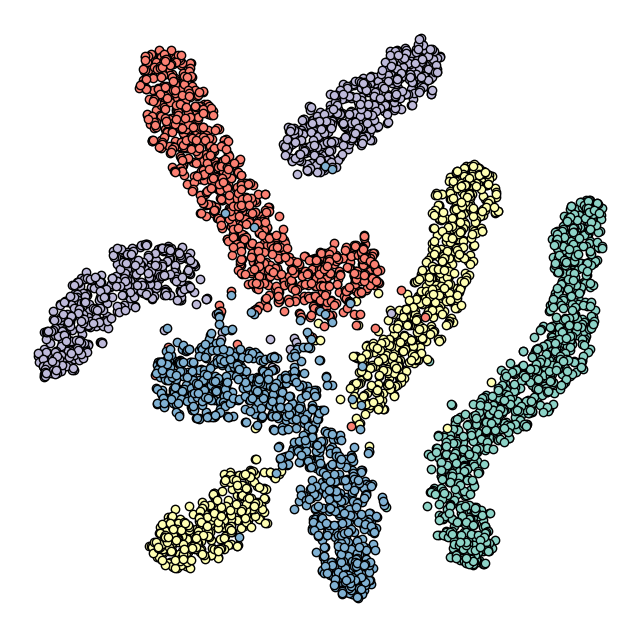

In [26]:
n_features = 7               # Set number of features/dimensions
case = 2                     # Select case 2 for data generation
n_samples = 1000             # Number of samples per cluster
noise_level = 0.3            # Noise level for the data

# Generate clustering data with n_features dimensions
X, true_labels = utils.data_generator_cl(n_features, case, n_samples, noise_level=noise_level)

unique_true_labels = np.unique(true_labels)
if X.shape[1] > 2:
    # If the data has more than 2 dimensions, use t-SNE to reduce to 2D for visualization
    tsne = TSNE(n_components=2, perplexity=30, n_iter=500, init='pca', random_state=42)
    X_tsne = tsne.fit_transform(X)
    
    # Plot t-SNE visualization
    plt.figure(figsize=(8, 8))
    # Plot each cluster manually and add legend
    for i, true_label in zip(range(0, 5 * n_samples, n_samples), unique_true_labels):
        plt.scatter(X_tsne[true_labels == true_label, 0], 
                    X_tsne[true_labels == true_label, 1], 
                    color=colors[true_label], 
                    edgecolors="black")   

    plt.xlabel('t-SNE 1')
    plt.ylabel('t-SNE 2')
    plt.axis('off')
    plt.show()
else:
    # If data is 2D, plot directly without t-SNE
    plt.figure(figsize=(8, 8))
    for i, true_label in zip(range(0, 5 * n_samples, n_samples), unique_true_labels):
        plt.scatter(X[true_labels == true_label, 0], 
                    X[true_labels == true_label, 1], 
                    color=colors[true_label], 
                    edgecolors="black")    
    plt.xlim(0, 2 * np.pi)
    plt.ylim(0, 2 * np.pi)
    plt.axis('off')
    plt.show()

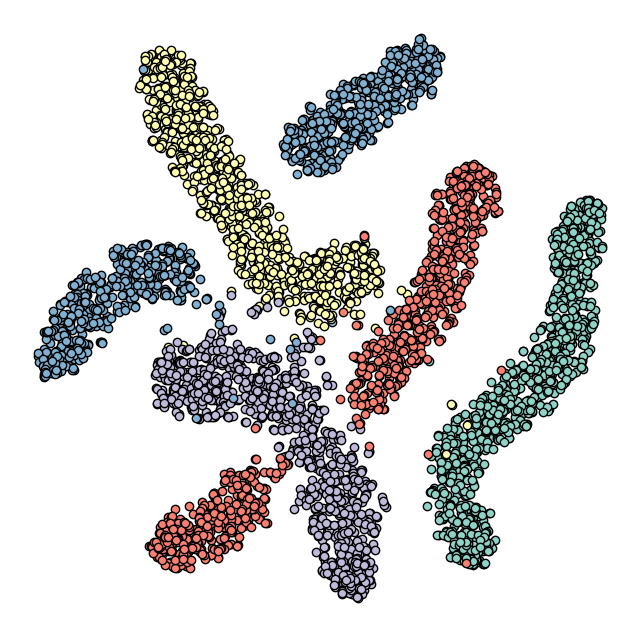

Adjusted Rand Index (ARI): 0.9629
Normalized Mutual Information (NMI): 0.9429


In [27]:
# PSM step
sigma = 0.6  # Set neighborhood radius for PSM
R = utils.angle_to_cos_sin(X)  # Convert angle values to cosine-sine pairs
subm = psm(R, sigma, 5, rho=0.001, e_n=2 * n_features - 1)  # Apply PSM algorithm
c = utils.cos_sin_to_angle(subm)  # Convert back to angle representation
c_1 = (c + 2 * PI) % (2 * PI)    # Adjust angles to be in the range [0, 2π]

# DBSCAN clustering on the PSM processed data
min_samples = 20  # Minimum samples required for DBSCAN neighborhood
# utils.plot_k_distance(c_1, min_samples)  # Plot k-distance graph to help select eps
eps = 0.3  # Set epsilon neighborhood parameter for DBSCAN

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
clusters = dbscan.fit_predict(c_1)

# Identify noise points (label -1) and inliers (normal clusters)
mask_inliers = clusters != -1
mask_outliers = clusters == -1

X_inliers = c_1[mask_inliers]
clusters_inliers = clusters[mask_inliers]
X_outliers = c_1[mask_outliers]

# Use k-Nearest Neighbors to reclassify the outliers using inliers as training data
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_inliers, clusters_inliers)
predicted_clusters_outliers = knn.predict(X_outliers)

# Update the original cluster labels with the predicted labels for outliers
final_clusters = clusters.copy()
final_clusters[mask_outliers] = predicted_clusters_outliers

# Visualization of the final clustering results
if X.shape[1] > 2:
    plt.figure(figsize=(8, 8))
    unique_clusters = np.unique(final_clusters)
    # Plot each cluster in the t-SNE reduced space
    for cluster in unique_clusters:
        plt.scatter(
            X_tsne[final_clusters == cluster, 0],
            X_tsne[final_clusters == cluster, 1],
            color=colors[cluster],
            label=f"Cluster {cluster}",            
            edgecolors="black"
        )
    plt.xlabel('t-SNE 1')
    plt.ylabel('t-SNE 2')
    plt.axis('off')
    plt.show()
else:
    # If data is 2D, visualize directly
    plt.figure(figsize=(8, 8))
    unique_clusters = np.unique(final_clusters)   
    for cluster in unique_clusters:
        plt.scatter(
            X[final_clusters == cluster, 0],
            X[final_clusters == cluster, 1],
            color=colors[cluster],
            label=f"Cluster {cluster}",
            edgecolors="black"
        )
    plt.xlim(0, 2 * np.pi)
    plt.ylim(0, 2 * np.pi)
    plt.axis('off')
    plt.show()

# Compute evaluation metrics: Adjusted Rand Index (ARI) and Normalized Mutual Information (NMI)
ari = metrics.adjusted_rand_score(true_labels, final_clusters)
print(f"Adjusted Rand Index (ARI): {ari:.4f}")

nmi = metrics.normalized_mutual_info_score(true_labels, final_clusters)
print(f"Normalized Mutual Information (NMI): {nmi:.4f}")


## Compare with other methods

In [28]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import SpectralClustering

### Clone the repository:

If you want to compare with Torus PCA and MINT-AGE method, please Git clone the code from the paper *Learning torus PCA-based classification for multiscale RNA correction with application to SARS-CoV-2*.

In [ ]:
!git@gitlab.gwdg.de:henrik.wiechers1/clean-mintage-code.git

In [ ]:
from PNDS_io import find_files, import_csv, import_lists, export_csv
from PNDS_plot import (scatter_plots, var_plot, inv_var_plot, residual_plots,
                       sphere_views, make_circle, colored_scatter_plots,
                       one_scatter_plot, abs_var_plot, residues_plot, rainbow,
                       one_two_plot, scatter_plot, custom_histogram,
                       one_sphere_view, linear_1d_plot, scatter_plot_3d,
                       scatter_plot_plus_3d, rainbow_scatter_plots, plot_thread)
from PNDS_geometry import RESHify_1D, unRESHify_1D, torus_distances, euclideanize
from PNDS_PNS  import (pns_loop, fold_points, unfold_points, as_matrix)
from PNDS_RNA_clustering import new_multi_slink, __slink_pns
from shape_analysis import pre_clustering

In [29]:
def torus_pca(data):
    sphere_points, means, half = RESHify_1D(data, False, 'gap')
    spheres, projected_points, distances = pns_loop(sphere_points, 10, 10, degenerate=False, verbose=False, mode='torus', half=half)
    phi = np.linspace(0,2*PI,1001)
    phi = np.vstack((np.sin(phi), np.cos(phi))).T
    unfolded_1d = unRESHify_1D(unfold_points(projected_points[-2], spheres[:-1]), means, half)
    unfolded_1d = np.radians(unfolded_1d)
    
    return unfolded_1d, projected_points, distances, spheres, means, half

In [30]:
n_features = 7               # Set number of features/dimensions
case = 1                     # Select case 2 for data generation
n_samples = 1000             # Number of samples per cluster
noise_level = 0.5            # Noise level for the data

# Generate clustering data with n_features dimensions
X, true_labels = utils.data_generator_cl(n_features, case, n_samples, noise_level=noise_level)

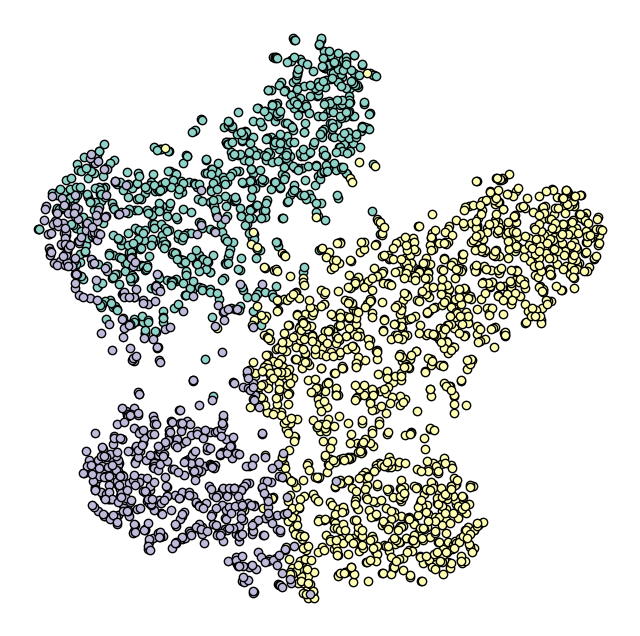

Adjusted Rand Index (ARI): 0.4933
Normalized Mutual Information (NMI): 0.5364


In [31]:
# DBSCAN
dbscan = DBSCAN(eps=1.0, min_samples=50)
clusters = dbscan.fit_predict(X)
mask_inliers = clusters != -1
mask_outliers = clusters == -1
X_inliers = X[mask_inliers]
clusters_inliers = clusters[mask_inliers]
X_outliers = X[mask_outliers]
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_inliers, clusters_inliers)
predicted_clusters_outliers = knn.predict(X_outliers)
final_clusters = clusters.copy()
final_clusters[mask_outliers] = predicted_clusters_outliers


plt.figure(figsize = (8, 8))
unique_clusters = np.unique(final_clusters)
tsne = TSNE(n_components=2, perplexity=30, n_iter=500, init='pca', random_state=42)
X_tsne = tsne.fit_transform(X)

if X.shape[1] > 2:
    for cluster in unique_clusters:
        plt.scatter(
            X_tsne[final_clusters == cluster, 0],
            X_tsne[final_clusters == cluster, 1],
            color=colors[cluster],
            label=f"Cluster {cluster}",
            edgecolors="black",            
        )
    plt.xlabel('t-SNE 1')
    plt.ylabel('t-SNE 2')
    legend_list = ['Noises']
    for i in range(max(clusters)+1):
        legend_list.append('C'+str(i+1))
    plt.axis('off')
    plt.show()
else:
# 绘制散点图
    for cluster in unique_clusters:
        plt.scatter(
            X[final_clusters == cluster, 0],
            X[final_clusters == cluster, 1],
            color=colors[cluster],
            label=f"Cluster {cluster}",
            edgecolors="black"
        )
    plt.xlim(0, 2*np.pi)
    plt.ylim(0, 2*np.pi)
    legend_list = ['Noises']
    for i in range(max(clusters)+1):
        legend_list.append('C'+str(i+1))
    plt.axis('off')
    plt.show()
    

# Compute evaluation metrics: Adjusted Rand Index (ARI) and Normalized Mutual Information (NMI)
ari = metrics.adjusted_rand_score(true_labels, final_clusters)
print(f"Adjusted Rand Index (ARI): {ari:.4f}")

nmi = metrics.normalized_mutual_info_score(true_labels, final_clusters)
print(f"Normalized Mutual Information (NMI): {nmi:.4f}")

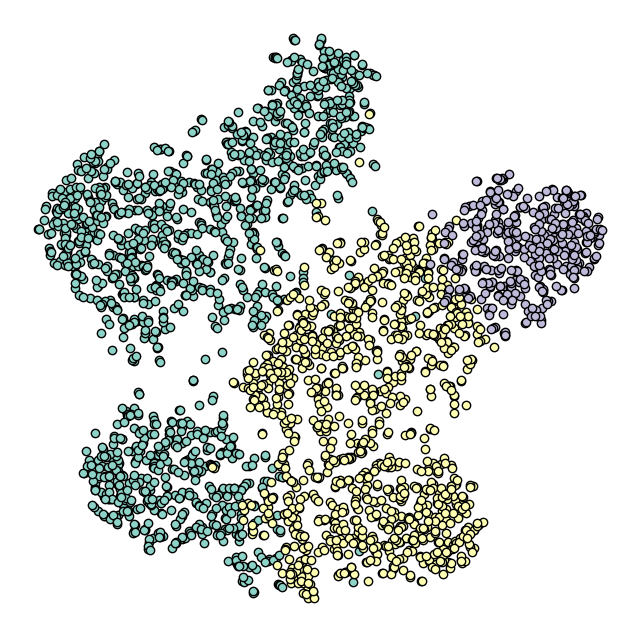

Adjusted Rand Index (ARI): 0.3547
Normalized Mutual Information (NMI): 0.4381


In [32]:
# hierarchical_clustering
hierarchical_clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')
clusters = hierarchical_clustering.fit_predict(X)

# Visualization of the final clustering results
if X.shape[1] > 2:
    plt.figure(figsize=(8, 8))
    unique_clusters = np.unique(clusters)
    # Plot each cluster in the t-SNE reduced space
    for cluster in unique_clusters:
        plt.scatter(
            X_tsne[clusters == cluster, 0],
            X_tsne[clusters == cluster, 1],
            color=colors[cluster],
            label=f"Cluster {cluster}",            
            edgecolors="black"
        )
    plt.xlabel('t-SNE 1')
    plt.ylabel('t-SNE 2')
    plt.axis('off')
    plt.show()
else:
    # If data is 2D, visualize directly
    plt.figure(figsize=(8, 8))
    unique_clusters = np.unique(clusters)   
    for cluster in unique_clusters:
        plt.scatter(
            X[clusters == cluster, 0],
            X[clusters == cluster, 1],
            color=colors[cluster],
            label=f"Cluster {cluster}",
            edgecolors="black"
        )
    plt.xlim(0, 2 * np.pi)
    plt.ylim(0, 2 * np.pi)
    plt.axis('off')
    plt.show()

# Compute evaluation metrics: Adjusted Rand Index (ARI) and Normalized Mutual Information (NMI)
ari = metrics.adjusted_rand_score(true_labels, clusters)
print(f"Adjusted Rand Index (ARI): {ari:.4f}")

nmi = metrics.normalized_mutual_info_score(true_labels, clusters)
print(f"Normalized Mutual Information (NMI): {nmi:.4f}")

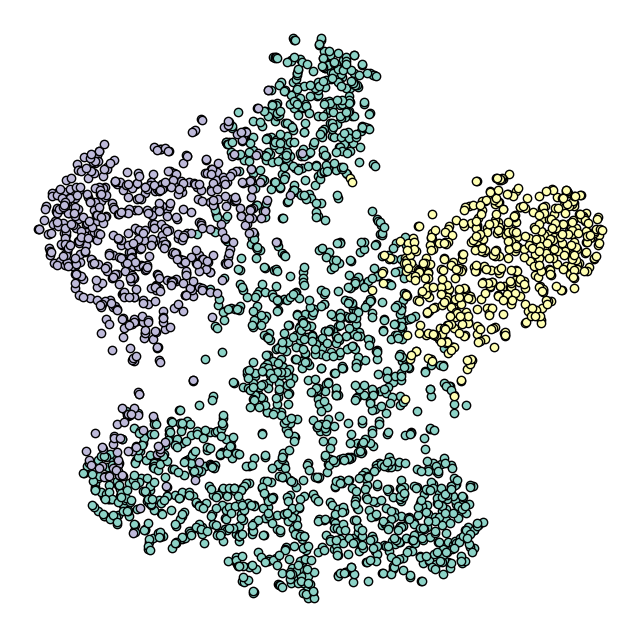

Adjusted Rand Index (ARI): 0.2744
Normalized Mutual Information (NMI): 0.4098


In [33]:
# spectral_clustering
spectral_clustering = SpectralClustering(
            n_clusters=3,
            affinity='rbf', 
            gamma=1.0,       
            random_state=42,
            assign_labels='discretize')
clusters = spectral_clustering.fit_predict(X)

# Visualization of the final clustering results
if X.shape[1] > 2:
    plt.figure(figsize=(8, 8))
    unique_clusters = np.unique(clusters)
    # Plot each cluster in the t-SNE reduced space
    for cluster in unique_clusters:
        plt.scatter(
            X_tsne[clusters == cluster, 0],
            X_tsne[clusters == cluster, 1],
            color=colors[cluster],
            label=f"Cluster {cluster}",            
            edgecolors="black"
        )
    plt.xlabel('t-SNE 1')
    plt.ylabel('t-SNE 2')
    plt.axis('off')
    plt.show()
else:
    # If data is 2D, visualize directly
    plt.figure(figsize=(8, 8))
    unique_clusters = np.unique(clusters)   
    for cluster in unique_clusters:
        plt.scatter(
            X[clusters == cluster, 0],
            X[clusters == cluster, 1],
            color=colors[cluster],
            label=f"Cluster {cluster}",
            edgecolors="black"
        )
    plt.xlim(0, 2 * np.pi)
    plt.ylim(0, 2 * np.pi)
    plt.axis('off')
    plt.show()

# Compute evaluation metrics: Adjusted Rand Index (ARI) and Normalized Mutual Information (NMI)
ari = metrics.adjusted_rand_score(true_labels, clusters)
print(f"Adjusted Rand Index (ARI): {ari:.4f}")

nmi = metrics.normalized_mutual_info_score(true_labels, clusters)
print(f"Normalized Mutual Information (NMI): {nmi:.4f}")

In [ ]:
# MINT-AGE
m = 50
percentage = 0.05
q_fold = 0.15

cluster_list, outlier_list, name = pre_clustering(input_data=utils.radian_to_degree(X), m=m,
                                                      percentage=percentage,
                                                      string_folder='simulation/clustering', method=average,
                                                      q_fold=q_fold)
cluster_list, noise = new_multi_slink(12000, data=utils.radian_to_degree(X), cluster_list=cluster_list,outlier_list=outlier_list)
outlier_list = [i for i in range(len(X)) if i not in [cluster_element for cluster in cluster_list for cluster_element in cluster]]